In [1]:
from manim import *

Manim Community v0.16.0.post0

In [353]:
#### A bunch of helper functions and constants
#### then some useful Mobjects like dice, histograms, plots created below

FINAL_EQN_VGROUP = None

EQN_SIZE = 70
EQN_SIZE_2 = 60

K_COLOR = BLUE
Z_COLOR = YELLOW_B #_B #GREEN_B
X_COLOR = Z_COLOR #YELLOW #GREEN_B
N_COLOR = ORANGE
E_COLOR = GRAY_A
COLOR_DICT = {"k":K_COLOR, "x":X_COLOR, "n":N_COLOR, "Z":Z_COLOR,"\mathbb{E}\Bigl[":E_COLOR,"\mathbb{E}[":E_COLOR,"\Bigr]":E_COLOR}

TEXT_COLOR = GRAY_B
DELAY = 0.1
SKIP_MODE = False #mode to speed up animatins

def printEnumerate(thing):
    for a,b in enumerate(thing):
        print(a,b)

def MathTexAndColor(*tex):
        eqn = MathTex(*tex,  font_size = EQN_SIZE,tex_to_color_map=COLOR_DICT)
        return eqn


EQN_SIZE_3 = 60
def MathTexAndColor3(*tex):
        eqn = MathTex(*tex,  font_size = EQN_SIZE_3) #,tex_to_color_map=COLOR_DICT)
        eqn.set_color_by_tex("k", K_COLOR)
        eqn.set_color_by_tex("x", X_COLOR)
        eqn.set_color_by_tex("Z", Z_COLOR)
        return eqn
    
def set_new_location(A,B):
    A.set_x(B.get_x())
    A.set_y(B.get_y())
    
def color_and_move_this_eqn(eqn_name,eqn_target):
    eqn_name.set_color_by_tex("k", K_COLOR)
    eqn_name.set_color_by_tex("x", X_COLOR)
    eqn_name.next_to(eqn_target,DOWN*8)
    eqn_name.align_to(eqn_target,LEFT)

## Some useful Mobjects, liek the dice faces and bell curve and histograms for dice

DICE_COLOR = TEAL
def make_dice_face(i,my_dice_color=DICE_COLOR):
    dot = lambda: Dot(color=my_dice_color).scale(1.5)
    dots = {
        1: dot(),
        2: VGroup(*[dot().shift(DL/3), dot().shift(UR/3)]),
        3: VGroup(*[dot().shift(UL/3), dot(), dot().shift(DR/3)]),
        4: VGroup(*[dot().shift((i*UP+j*LEFT)/3) for i in (-1, 1) for j in (-1, 1)]),
        5: VGroup(*[dot().shift((i*UP+j*LEFT)/3) for i in (-1, 1) for j in (-1, 1)], dot()),
        6: VGroup(*[dot().shift( (i-1) * DOWN/3 + (j-.5) * RIGHT/2) for i in range(3) for j in range(2)])
    }
    sq = Square(1.2, fill_opacity=.8, fill_color=BLACK).round_corners(.25).move_to(dots[i])
    face = VGroup(sq, dots[i])
    face.die_value = i
    return face

HIST_WIDTH = 6
HIST_HEIGHT = 1.85
HIST_COLOR = DICE_COLOR #BLUE

def make_histogram(min_x,max_x,P,x_font_size=24):
    rng = max_x - min_x + 1
    chart = BarChart(
            values=P,
            bar_names=np.arange(min_x,max_x+1,1),
            y_range=[0,1.25*np.max(P),0.25*np.max(P)],
            bar_colors = [HIST_COLOR for _ in range(rng)],
            x_length=HIST_WIDTH,
            y_length=HIST_HEIGHT,
            x_axis_config={"font_size": x_font_size},
            y_axis_config={"font_size": 1, "line_to_number_buff":0}
        )
    return chart

import sympy #from sympy import *
def sum_of_dice_hist(n):
    font_sizes = [None,60,40,30,20,12]
    if n==0:
        return None
    else:
        #n is number of dice to sum up
        x = sympy.symbols("x")
        f = (1/6*(1+x+x**2+x**3+x**4+x**5))**n #fair dice 0-5 valued dice
        ans = sympy.series(f, x, 0, n=5*n+1)
        P = [ans.coeff(x,k) for k in range(5*n+1)]
        #print(P)
        return make_histogram(n,6*n,P,x_font_size=font_sizes[n]) #make_histogram(n,6*n,[ans.coeff(x,k) for k in range(5*n)])

#print(sum_of_dice_hist(1))

#print(sum_of_dice_hist(2))

#print(sum_of_dice_hist(3))

#
DICE_HIST = [sum_of_dice_hist(n) for n in range(6)]

#Make the Bell curve
BELL_CURVE_MAX_X = 2.25 #this is tuned to match the sum of 5 dice histogram right now

ax = Axes(
        x_range=[0,2*BELL_CURVE_MAX_X,BELL_CURVE_MAX_X],
        y_range=[0, 1.25, 0.25],
        tips=False,
        x_length=HIST_WIDTH,
        y_length=HIST_HEIGHT,
        axis_config={"include_numbers": False},
    )

# x_min must be > 0 because log is undefined at 0.

graph = ax.plot(lambda x: np.exp(-(x-BELL_CURVE_MAX_X)** 2), x_range=[0, 2*BELL_CURVE_MAX_X],color=HIST_COLOR, use_smoothing=True)
area = ax.get_area(
    graph,
    x_range=(0,2*BELL_CURVE_MAX_X),
    color=Z_COLOR, #HIST_COLOR,
    opacity=0.7,
)

BELL_CURVE = VGroup(ax, graph, area)

print("Done!")
#

Done!


In [354]:
%%manim -ql -v CRITICAL gaussian_moments

#Description:
#Starting with the PDF of the Gaussian, write out the formula for the moments
#then use integration by parts to get the recursion E[Z^k]=(k-1)E[Z^{k-2}]
#This final equation is saved into a global variable, THE_FINAL_EQN_VGROUP, which is 
# then used in the next scene

THE_FINAL_EQN_VGROUP = None

#IMPORTANT: -ql = low quality. Remove flag before export!

class gaussian_moments(Scene):
    
    def skip_create(self,*args):
        if SKIP_MODE == False:
            self.play(Create(*args))
            self.wait(DELAY)
        else:
            self.add(*args)
    
    def construct(self):
        
        #setup the equation but in parts so we can manipualte it
        eqn_start = MathTex(r"\mathbb{E}[",r"Z",r"^{{k}}]",r"=", r"\frac{1}{\sqrt{2\pi}}", r" \intop_{-\infty}^{\infty}", font_size=EQN_SIZE)
        eqn_start.set_color_by_tex("k", K_COLOR)
        eqn_start.set_color_by_tex("Z", Z_COLOR)
        
        printEnumerate(eqn_start)
        #print("eqn_start")
        #for i,x in enumerate(eqn_start):
        #    print(i,x)
        
        eqn_midA = MathTexAndColor(r" {{x}}^{{k}} \Bigr) ")
        eqn_midA[-1].color = BLACK #make the bracket black
        eqn_midB = MathTexAndColor(r" e^{-\frac{1}{2}{{x}}^2}} {{\Bigr)}}")
        eqn_midB[-1].color = BLACK #make the bracket black
        eqn_end = MathTexAndColor(r"d {{x}}")
        
        eqn = VGroup(eqn_start,eqn_midA,eqn_midB,eqn_end).arrange(RIGHT)
        eqn.shift(2.25*UP+0.5*LEFT)
        #eqn.to_corner(UL)
        
        #Now make a copy of the equation, but spaced so there is enough room to covert x^k into x^{k-1} x
        eqn_midA_final = MathTexAndColor(r" {{x}}^{ {{k}} - 1 } {{\Bigl(}} {{x}}  ")
        printEnumerate(eqn_midA_final)
        eqn_midA_final[5].color = BLACK #make the bracket black
        
        #arrange eqn using x^{k-1}x
        eqn_w_space = VGroup(eqn_start.copy(),eqn_midA_final,eqn_midB.copy(),eqn_end.copy()).arrange(RIGHT)
        eqn_w_space.align_to(eqn,UP)
        eqn_w_space.align_to(eqn,LEFT)
        eqn_w_space.shift(0.5*LEFT)
        #eqn_w_space.to_corner(UL)
        
        #replace x^{k-1}x by x^k (so everything else will be spaced correctly)
        eqn_midA_space = eqn_midA.copy() 
        set_new_location(eqn_midA_space,eqn_midA_final) 
        eqn_w_space[1] = eqn_midA_space
        
        #eqn2.set_color_by_tex("k", K_COLOR)
        #eqn2.set_color_by_tex("x", X_COLOR)
        
        #####
        #Animate the equation in slowly piece by piece so voice over explanation can be added
        #####
        
        self.play(FadeIn(eqn_start[0:6])) #fade in first part
        self.wait(DELAY)
        
        self.play(FadeIn(eqn_start[-1],eqn_end)) #fade in integral sign
        self.wait(DELAY)
        
        pdf_text = Text("Probability Density Function")
        pdf_text.color=TEXT_COLOR
        pdf_text.next_to(eqn_start[-1],DOWN)
        pdf_text.set_x(0)
        
        pdf = MathTexAndColor3(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"} {{x}}^2}",r"/ {\sqrt{2\pi", r"}}")
        #MathTex(r"p({{x}})={\scriptstyle\frac{1}{\sqrt{2\pi}}} e^{-\frac{1}{2}{{x}}^2}}", color=TEXT_COLOR, font_size=EQN_SIZE_2 )
        pdf.set_color_by_tex("x",X_COLOR)
        pdf.next_to(pdf_text,DOWN)
        
        pdf_graph = BELL_CURVE.copy() #FunctionGraph(lambda t: np.exp(-0.5*t**2),color=TEXT_COLOR)
        pdf_graph.next_to(pdf,DOWN)
        
        pdf_list = [pdf,pdf_graph]
        self.play(FadeIn(pdf_text,shift=DOWN), ReplacementTransform(eqn_start[1].copy(),pdf))
        self.play(FadeIn(pdf_graph,shift=DOWN)) ##*[FadeIn(mob) for mob in pdf_list]) #fade in PDF
        self.wait(DELAY)
        self.play(FadeIn(eqn_start[-2],eqn_midB)) #fade in 1/sqrt(2pi) and e^-x^2/2
        self.wait(DELAY)
        pdf_list = [pdf,pdf_text,pdf_graph]
        self.play(*[FadeOut(mob) for mob in pdf_list]) #fade out PDF
        self.wait(DELAY)

        box = SurroundingRectangle(eqn_start[1:4]) #box to surround z^k
        
        self.play(Create(box))
        self.play(ReplacementTransform(eqn_start[1:4].copy(),eqn_midA,path_arc=-1.57))
        self.wait(DELAY)
        self.play(FadeOut(box))
        self.wait(DELAY)
        
        #if SKIP_MODE == False: 
        #    for parts in [ [eqn_start[0:4]],[eqn_start[5],eqn_end],[eqn_start[4],eqn_midB],[eqn_midA]]:
        #        self.play(FadeIn(*parts))
        #        self.wait(DELAY)
        #else:
        #    self.add(eqn)
            
        if SKIP_MODE == False:
            int_by_parts_q = Text("Integration by parts?")
            int_by_parts_q.color = TEXT_COLOR
            int_by_parts_q.next_to(eqn_midA,UP)
            int_by_parts_q.align_to(eqn_midA,LEFT)
            self.play(Create(int_by_parts_q))
            self.wait(DELAY)
            self.play(FadeOut(int_by_parts_q))
            self.wait(DELAY)
            
            
            
        self.play(ReplacementTransform(eqn,eqn_w_space))
        self.play(TransformMatchingTex(eqn_midA_space,eqn_midA_final))
        self.wait(DELAY)
        self.play(FadeToColor(eqn_midB[-1], color=WHITE),FadeToColor(eqn_midA_final[5], color=WHITE))
        self.wait(DELAY)
        
        back_brace = BraceLabel(VGroup(eqn_midA_final[-4:-1],eqn_midB),r"\text{Do }\int")
        back_brace.color = TEXT_COLOR
        self.skip_create(back_brace)
        
        front_brace = BraceLabel(eqn_midA_final[0:5],r"\text{Do }\frac{d}{dx}")
        front_brace.align_to(back_brace,UP)
        front_brace.color = TEXT_COLOR
        self.skip_create(front_brace)
        
        int_by_parts = Text("Integration by parts!")
        int_by_parts.color = TEXT_COLOR
        int_by_parts.next_to(eqn_midA_final,UP)
        int_by_parts.align_to(eqn_midA_final,LEFT)
        self.skip_create(int_by_parts)
        
        
        eqn_ibp = MathTex(r"=", r"\frac{-1}{\sqrt{2\pi}}", r" \intop_{-\infty}^{\infty}", r"({{k}}-1){{x}}^{{{k}}-2}",r"\bigl(-e^{-\frac{1}{2}{{x}}^2}}\bigr)",r"d{{x}}", font_size=EQN_SIZE)
        
        
        eqn_ibp_no_minus = MathTex(r"=", r"\frac{1}{\sqrt{2\pi}}", r"\intop_{-\infty}^{\infty}", r"({{k}}-1){{x}}^{{{k}}-2}",r"\bigl(e^{-\frac{1}{2}{{x}}^2}}\bigr)",r"d{{x}}", font_size=EQN_SIZE)
        
        
        eqn_ibp_k = MathTex(r"=", r"({{k}}-1)", r"\frac{1}{\sqrt{2\pi}}", r"\intop_{-\infty}^{\infty}", r"{{x}}^{{{k}}-2}",r"\bigl(e^{-\frac{1}{2}{{x}}^2}}\bigr)",r"d{{x}}", font_size=EQN_SIZE)
        
        #line up to the equals sign from the first eqn
        color_and_move_this_eqn(eqn_ibp,eqn_start[3])
        color_and_move_this_eqn(eqn_ibp_no_minus,eqn_start[3])
        color_and_move_this_eqn(eqn_ibp_k,eqn_start[3])
        
        
        
        
        #print("eqn_midA_final")
        #for e,i in enumerate(eqn_midA_final):
        #    print(e,i)
            
        #print("eqn_midB")
        #for e,i in enumerate(eqn_midB):
        #    print(e,i)
            
        #print("eqn_ibp_k")
        #for e,i in enumerate(eqn_ibp_k):
        #    print(e,i)
        #    
        #print("eqn_ibp_no_minus")
        #for e,i in enumerate(eqn_ibp_no_minus):
        #    print(e,i)
            
        
        #move over integral and 1/sqrt{2pi}
        pairs_list = [ [eqn_start[3],eqn_ibp[0]],[eqn_start[4],eqn_ibp[1]],[eqn_start[5],eqn_ibp[2]],[eqn_end,eqn_ibp[-2:]] ] 
        self.play(*[TransformFromCopy(a,b) for a,b in pairs_list])
        
        #do the derivative
        pairs_list = [ [eqn_midA_final[0:-4], eqn_ibp[3:10]] ]
        self.play(*[TransformFromCopy(a,b) for a,b in pairs_list], Indicate(front_brace))
        self.play(FadeOut(front_brace))
        self.wait(DELAY)
       
        
        #do the integral
        pairs_list = [ [eqn_midA_final[5:], eqn_ibp[10]],[eqn_midB, eqn_ibp[11:13]] ]
        self.play(*[TransformFromCopy(a,b) for a,b in pairs_list], Indicate(back_brace))
        self.play(FadeOut(back_brace),FadeOut(int_by_parts))
        self.wait(DELAY)
       
        
       
        
        #eqn_ibp_2MathTex(r"=", r"\frac{1}{\sqrt{2\pi}}", r" \intop_{-\infty}^{\infty}", r"({{k}}-1){{x}}^{{{k}}-2}",r"\bigl( e^{-\frac{1}{2}{{x}}^2}} \bigr)",r"d {{x}}", font_size=EQN_SIZE)
        
        
        self.play(ReplacementTransform(eqn_ibp,eqn_ibp_no_minus))
        self.wait(DELAY)
        
        self.play(TransformMatchingTex(eqn_ibp_no_minus,eqn_ibp_k))
        self.wait(DELAY)
        
        box = SurroundingRectangle(eqn_ibp_k[4:])
        self.skip_create(box)
        
        moment = MathTexAndColor(r"\mathbb{E}[Z^{ {{k}}-2} ]")
        moment.next_to(eqn_ibp_k[3],RIGHT)
        moment.align_to(eqn_ibp_k[3],DOWN)
        
        
        
        self.play(ReplacementTransform(eqn_ibp_k[4:],moment),FadeOut(box))
        self.wait(DELAY)
        
        
        LHS = VGroup(eqn_w_space[0][0:6])
        LHS.generate_target()
        LHS.target.shift(1.65*RIGHT+0.3*UP) #this shift was optimized for the NEXT scene to fit
        
        
        
        RHS = VGroup(eqn_ibp_k[1],eqn_ibp_k[2],eqn_ibp_k[3],moment)
        RHS.generate_target()
        RHS.target.next_to(LHS.target,RIGHT)
        
        #eqn_w_space[1] ,eqn_start[0]
        fade_list = [eqn_ibp_k[0],eqn[2],eqn_w_space[0][6:],eqn_midA_final, eqn_w_space[2],eqn_w_space[3], eqn_end]    
        self.play(MoveToTarget(LHS),MoveToTarget(RHS), *[FadeOut(mob) for mob in fade_list] )
        self.wait(DELAY)
        
        global THE_FINAL_EQN_VGROUP
        THE_FINAL_EQN_VGROUP = VGroup(LHS,RHS) #save the final equation to be used in the next scene
        
        
        #printEnumerate(FINAL_EQN_VGROUP)
        
        
        self.wait(2)

0 SingleStringMathTex('\\mathbb{E}[')
1 SingleStringMathTex('Z')
2 SingleStringMathTex('^')
3 SingleStringMathTex('k')
4 SingleStringMathTex(']')
5 SingleStringMathTex('=')
6 SingleStringMathTex('\\frac{1}{\\sqrt{2\\pi}}')
7 SingleStringMathTex(' \\intop_{-\\infty}^{\\infty}')
0 SingleStringMathTex(' ')
1 SingleStringMathTex('x')
2 SingleStringMathTex('^{ ')
3 SingleStringMathTex('k')
4 SingleStringMathTex(' - 1 } ')
5 SingleStringMathTex('\\Bigl(')
6 SingleStringMathTex(' ')
7 SingleStringMathTex('x')
8 SingleStringMathTex('  ')


In [308]:
%%manim -ql -v CRITICAL double_factorials

#Description:
#Starting with the recusion E[Z^k]=(k-1)E[Z^{k-2}],
#solve it to get the double factorials and zero formula
#Note that the global variable THE_FINAL_EQN_VGROUP, is used to start the scene

class double_factorials(Scene):
    
    def skip_create(self,*args):
        if SKIP_MODE == False:
            self.play(Create(*args))
            self.wait(DELAY)
        else:
            self.add(*args)
    
    def construct(self):
        FINAL_EQN_VGROUP = THE_FINAL_EQN_VGROUP.copy()
        #######This shift was already animated in previous scene: FINAL_EQN_VGROUP.shift(1.65*RIGHT+0.3*UP)
        self.add(FINAL_EQN_VGROUP) #the final equation from the previous scene
        self.wait(DELAY)
        
        #self.play(MoveToTarget(FINAL_EQN_VGROUP))
        
        
        #return 0
        
        
        
        #for e in FINAL_EQN_VGROUP:
        #    print("---")
        #    printEnumerate(e)
        
        #k_Es = the list of Tex expression E[Z^k]
        M=[1,0,1,0,3,0,15,0,105]
        k_Es = [MathTexAndColor3(r"\mathbb{E}",r"[",r"Z^",str(k),"]") for k in range(9)]
        k_Es_ans = [MathTexAndColor3(str(M[k])) for k in range(9)]
        #r"\mathbb{E}",r"[",r"Z^",str(k),"]","=",
    
        #color the "k"s correctly (note that the ks are 0,1,2,3...)
        for mob in k_Es:
        #    printEnumerate(mob)
            mob[3].color = K_COLOR
        
        
        #add them to a group, arrange and set to side of screen
        k_Es_group = VGroup(*k_Es).arrange(RIGHT, buff = MED_LARGE_BUFF)
        k_Es_group.to_edge(LEFT)
        k_Es_group.shift(0.95*DOWN)
        
        for i in range(9):
            set_new_location(k_Es_ans[i],k_Es[i])
        
        #make boxes around the k's
        s_box = SurroundingRectangle(k_Es[0],buff=0.15)
        k_boxs = [Rectangle(width=s_box.width,height=0.618*s_box.width,color=GRAY_D) for i in range(9)]
        for i in range(9):
            set_new_location(k_boxs[i],k_Es[i])
            k_boxs[i].set_fill(GRAY_D,opacity=1) #box color is GRAY_D
        
        
        box_group = VGroup(*k_boxs)        
        #self.add(box_group)
        #self.add(k_Es_group) 
        
        #Arrows and labels
        ARROW_COLOR = GRAY_A
        
        
    
        even_arrows = [CurvedArrow(start_point=k_boxs[i].get_top(),end_point=k_boxs[i+2].get_top(),color=ARROW_COLOR,angle=-1.5707963267948966) for i in [0,2,4,6]]
        even_labels = [MathTex(r"\times",str(2*i+1),font_size=EQN_SIZE_3,color=ARROW_COLOR).next_to(even_arrows[i],UP) for i in range(3)]
        
        #same labels but with k-1 labeled and colored in correctly
        even_labels_colr = [MathTex(r"\times","(",str(2*i+2),"-1)",font_size=EQN_SIZE_3,color=ARROW_COLOR).next_to(even_arrows[i],UP) for i in range(3)]
        for mob in even_labels_colr:
            mob[2].color = K_COLOR #color in the k
        
        
        #printEnumerate(even_labels_colr[0])
        
        #self.add(*even_arrows)
        #self.add(*even_labels)
        
        odd_arrows = [CurvedArrow(start_point=k_boxs[i].get_bottom(),end_point=k_boxs[i+2].get_bottom(),color=ARROW_COLOR) for i in [1,3,5]]
        odd_labels = [MathTex(r"\times",str(2*i+2),font_size=EQN_SIZE_3,color=ARROW_COLOR).next_to(odd_arrows[i],DOWN) for i in range(3)]
        
        #self.add(*odd_arrows)
        #self.add(*odd_labels)
        
        #Add everything that was just created
        #self.add(box_group,k_Es_group,*even_arrows,*even_labels,*odd_arrows,*odd_labels)
        
        #Now animate the things out one at a time
        
        #Animate in E[Z^2]
        self.play(FadeIn(k_boxs[2]),Create(k_Es[2]))
        self.wait(DELAY)
        
        #Animate in E[Z^0]
        self.play(FadeIn(k_boxs[0],k_Es[0],even_arrows[0]))
        self.wait(DELAY)

        #Animate in E[Z^0] -> E[Z^2]
        self.play(FadeIn(even_labels_colr[0]))
        self.wait(DELAY)
        self.play(ReplacementTransform(even_labels_colr[0], even_labels[0])) #MatchingTex
        self.wait(DELAY)
        
        
        
        #Evaluate E[Z^0] = 1
        Z0_temp = MathTexAndColor3(r"\mathbb{E}",r"[",r"1","]")
        Z0_temp.align_to(k_Es[0],LEFT)
        Z0_temp.align_to(k_Es[0],DOWN)
        self.play(TransformMatchingTex(k_Es[0],Z0_temp))
        self.wait(DELAY)
        
        #printEnumerate(Z0_temp)
        
        #Z0_final is just the digit "1" that is leftover
        Z0_final = Z0_temp[2].copy()
        self.play(FadeOut(*[Z0_temp[k] for k in [0,1,3]]))#fade out all but the "1"
        
        #Bounce the 1 over the x1 to get E[Z^2]
        self.play(ReplacementTransform(Z0_final.copy(), k_Es_ans[2],path_arc=-1.57),FadeOut(k_Es[2]),Indicate(even_labels[0]))
        self.wait(DELAY)
        
        #Animate in E[Z^4]
        self.play(FadeIn(k_boxs[4]),Create(k_Es[4]))
        self.wait(DELAY)
        
        #Animate in the x(4-1) arrow
        self.play(FadeIn(even_arrows[1]))
        self.wait(DELAY)
        self.play(FadeIn(even_labels_colr[1]))
        self.wait(DELAY)
        
        #Animate x(4-1) -> x3
        self.play(ReplacementTransform(even_labels_colr[1], even_labels[1]))
        self.wait(DELAY)
        
        #Bounce 1 over to x1, x3 to evaluate E[Z^4]
        self.play(ReplacementTransform(Z0_final.copy(), k_Es_ans[2],path_arc=-1.57),Indicate(even_labels[0]))
        self.play(ReplacementTransform(k_Es_ans[2].copy(), k_Es_ans[4],path_arc=-1.57),FadeOut(k_Es[4]),Indicate(even_labels[1]))
        
        #Z^6:
        
        #Animate in E[Z^6]
        self.play(FadeIn(k_boxs[6]),Create(k_Es[6]))
        self.wait(DELAY)
        
        #Animate in the x(6-1) arrow
        self.play(FadeIn(even_arrows[2]))
        self.wait(DELAY)
        self.play(FadeIn(even_labels_colr[2]))
        self.wait(DELAY)
        
        #Animate x(6-1) -> x5
        self.play(ReplacementTransform(even_labels_colr[2], even_labels[2]))
        self.wait(DELAY)
        
        #Bounce 1 over to x1, x3, x5 to evaluate E[Z^6]
        self.play(ReplacementTransform(Z0_final.copy(), k_Es_ans[2],path_arc=-1.57),Indicate(even_labels[0]))
        self.play(ReplacementTransform(k_Es_ans[2].copy(), k_Es_ans[4],path_arc=-1.57),Indicate(even_labels[1]))
        self.play(ReplacementTransform(k_Es_ans[4].copy(), k_Es_ans[6],path_arc=-1.57),FadeOut(k_Es[6]),Indicate(even_labels[2]))
        
        
        #return 2
        
        ####Eqn with cases
        cases = MathTexAndColor3(r"\begin{cases} \phantom{(1-1)!!} \\ \phantom{(1-1)!!} \end{cases}")
        cases.next_to(FINAL_EQN_VGROUP[0])
        answer_even = MathTex(r"({{k}}-1)!! \: \text{ if }{{k}}\text{ is even}",font_size=EQN_SIZE_3)
        answer_even.set_color_by_tex("k", K_COLOR)        
        #printEnumerate(answer_even)
        answer_odd_0 = MathTex(r"0",font_size=EQN_SIZE_3)
        answer_odd_if = MathTex(r" \text{ if }{{k}}\text{ is }\,\text{odd}",font_size=EQN_SIZE_3)
        answer_odd_if.set_color_by_tex("k",K_COLOR)
        #printEnumerate(answer_odd_if)
        answer_even.next_to(cases,RIGHT)
        answer_even.align_to(cases,UP)
        answer_odd_0.next_to(cases,RIGHT)
        answer_odd_0.align_to(cases,DOWN)
        answer_odd_if.align_to(answer_even,RIGHT)
        answer_odd_if.align_to(cases,DOWN)
        
        
        
        answer_even_big = MathTex(r"({{k}}-1)!! \: \text{ if }{{k}}\text{ is even}",font_size=EQN_SIZE)
        answer_even_big.set_color_by_tex("k", K_COLOR)
        
        #self.play(FadeIn(answer_even),FadeIn(answer_odd_0),FadeIn(answer_odd_if))
        #printEnumerate(cases)
        
        #Replace RHS with the answer
        answer_even_big.next_to(FINAL_EQN_VGROUP[0],RIGHT)
        answer_even_big.align_to(FINAL_EQN_VGROUP[0],DOWN)
        self.play(FadeOut(FINAL_EQN_VGROUP[1]))        
        self.play(Create(answer_even_big))
        
        #odd moments
        #Animate in E[Z^1],E[Z^3],E[Z^5]
        self.play(*[FadeIn(k_boxs[k]) for k in [1,3,5]],*[Create(k_Es[k]) for k in [1,3,5]])
        self.wait(DELAY)
        
        #Animate in the odd arrows
        self.play(*[FadeIn(odd_arrows[k]) for k in [0,1]],*[FadeIn(odd_labels[k]) for k in [0,1]])
        self.wait(DELAY)
        
        #E[Z^1] = 0
        self.play(Transform(k_Es[1],k_Es_ans[1]))
        self.wait(DELAY)
        
        #bounce the 0 along
        self.play(ReplacementTransform(k_Es_ans[1].copy(), k_Es_ans[3],path_arc=1.57),Indicate(odd_labels[0]),FadeOut(k_Es[3]))
        self.play(ReplacementTransform(k_Es_ans[3].copy(), k_Es_ans[5],path_arc=1.57),Indicate(odd_labels[1]),FadeOut(k_Es[5]))
        self.wait(DELAY)
        
        #fade in the cases and final answer
        self.play(FadeIn(cases),ReplacementTransform(answer_even_big,answer_even),Create(answer_odd_0),Create(answer_odd_if))
        self.wait(DELAY)
        
        
        
        
        self.wait(2)
        
        

In [309]:
%%manim -ql -v CRITICAL intro
#Description:
#Intro scene that starts with dice rolls, and get to the question, But why is the CLT true?


FINAL_MOBJECTS_2=None #global variable used to store the final mobjects for the next scene
GAUSS_CURVE = None
EQN_SIZE_4 = 54
class intro(Scene):
    def construct(self):
        
        
        
        charts = [None]*6
        for i in range(1,6):
            charts[i] = DICE_HIST[i].copy()
        curve = BELL_CURVE.copy()
        curve.align_to(charts[5],UP)
        
        large_chart_scale = 1.5 #how much bigger to make the chart when its the only thing on the screen
        curve.scale(large_chart_scale)
        for i in range(1,6):
            charts[i].scale(large_chart_scale)
           
        #self.add(charts[1])
        #return 0
        # dice
        n_labels = [MathTex(r"\text{Sum of }","n",r"=",str(n),r"\text{ dice}",tex_to_color_map={"n":N_COLOR},font_size=EQN_SIZE_3).next_to(charts[i],UP) for n in range(6)]
        CLT_title = MathTex(r"\text{The Central Limit Theorem:}",font_size=EQN_SIZE_4)
        CLT_statement = MathTex(r"\text{Any}",r"^*",r"\text{ sum of }","n",r"\text{ random numbers}\approx",r"\text{Gaussian, as }","n",r"\to \infty",font_size=EQN_SIZE_4)
        
        CLT_statement[3].color = N_COLOR
        CLT_statement[6].color = N_COLOR
        CLT_text = VGroup(CLT_title,CLT_statement).arrange(DOWN)
        CLT_underline = Underline(CLT_title)
        CLT_text.add(CLT_underline)
        CLT_bak = SurroundingRectangle(CLT_text,color=GREY_D)
        CLT_text.add(CLT_bak)
        
        CLT_terms_any = CLT_statement[1]
        #CLT_terms_approx = CLT_text[5]
        CLT_statement.remove(CLT_terms_any)
        #CLT_text.remove(CLT_terms_approx)
        
        
        #as }n\to \infty
        #printEnumerate(CLT_text)
        #tiny_dude = Square(color=BLACK,side_length=0.001) 
        small_chart_scale = 0.8
        final_chart = charts[5].copy().scale(1/large_chart_scale*small_chart_scale)
        final_chart[1].remove(final_chart[1][2]) #delete the numbers labels on the final chart
        
        #printEnumerate(final_chart[1])
        
        final_curve = curve.copy().scale(1/large_chart_scale*small_chart_scale)
        final_chart.next_to(CLT_text,UP)
        final_curve.next_to(CLT_text,DOWN)
        #graphs = VGroup(VGroup(final_chart,final_curve).arrange(DOWN),tiny_dude).arrange(RIGHT,buff=0.1)
        
        
        
        n_label_final = MathTex(r"\text{Sum of }","n",r"\text{ dice}",tex_to_color_map={"n":N_COLOR},font_size=EQN_SIZE_4).next_to(final_chart,LEFT)
        z_label = MathTex(r"\text{Gaussian }",tex_to_color_map={"Z":Z_COLOR},font_size=EQN_SIZE_4).next_to(curve,LEFT)
        z_label_final = z_label.copy().next_to(final_curve,LEFT)
        
        DICE_SCALE = 0.95
        plus = MathTex(r"+",font_size=60)
        def sum_of_dice_vgroup(dice_val_list):
            mob_list = []
            for val in dice_val_list:
                mob_list.append(make_dice_face(val).scale(DICE_SCALE))
                mob_list.append(plus.copy())
                
            mob_list.pop() #remove the last plust
            return VGroup(*mob_list).arrange(RIGHT,buff=0.1)
        
        dice_buff = 0.2
        dice_sum = [None]*6
        dice_sum[1] = sum_of_dice_vgroup([3]).to_edge(UP,buff=dice_buff)
        dice_sum[2] = sum_of_dice_vgroup([2,5]).to_edge(UP,buff=dice_buff)
        dice_sum[3] = sum_of_dice_vgroup([3,4,3]).to_edge(UP,buff=dice_buff)
        dice_sum[4] = sum_of_dice_vgroup([6,1,2,5]).to_edge(UP,buff=dice_buff)
        dice_sum[5] = sum_of_dice_vgroup([2,5,1,6,3]).to_edge(UP,buff=dice_buff)
        
        #z_label = MathTexAndColor(r"Z").next_to(curve,LEFT)
        #self.add(n_labels[0])
        
        
        
        
        
        #setup for rolling in the first dice
        ROLL_IN_TIME = 1.0
        ROLL_IN_DISTANCE = 8.0
        SCHEDULE = [5,6,2,6,3] #schedule for the order the dice appear in 
        def my_updater(mob,dt,index):
            mob.total_time_since_updates += dt/ROLL_IN_TIME
            #print( min(len(SCHEDULE)-1,int(len(SCHEDULE)*mob.total_time_since_updates)) )
            if SCHEDULE[ min(len(SCHEDULE)-1,int(len(SCHEDULE)*mob.total_time_since_updates)) ] == mob.die_value:
                mob.set_opacity(1) #mob.total_time_since_updates)
            else:
                mob.set_opacity(0)
            mob.rotate(-2.0*360.0*DEGREES*dt/ROLL_IN_TIME)
            mob.shift(ROLL_IN_DISTANCE*dt/ROLL_IN_TIME*RIGHT)
        
        roll_in_die = [make_dice_face(i+1).scale(DICE_SCALE) for i in range(6)]
        for i in range(6):
            set_new_location(roll_in_die[i],dice_sum[1])
            roll_in_die[i].shift(ROLL_IN_DISTANCE*LEFT)
            
            roll_in_die[i].total_time_since_updates = 0
            
            roll_in_die[i].set_opacity(0)
            roll_in_die[i].add_updater(lambda mob,dt,ix=i:my_updater(mob,dt,ix)) 
            #the last line is based on the weird bug described in https://youtu.be/vUIfNN6Bs_4?t=1017
            
        #-------
        #Animated dice rolling in 
        #-------
        #the strategy is to have all 6 faces rolling together identically
        #the dice updater function turns them on/off at the right moments in time
        for i in range(6):
            self.add(roll_in_die[i])
        self.wait(ROLL_IN_TIME) #this will animate the dice rolling in!
        for i in range(6):
            roll_in_die[i].clear_updaters()
            self.remove(roll_in_die[i])
        
        self.add(dice_sum[1])
        
        #----
        #Fade in the first chart, then morph from 1,2,3,4,5 dice
        #-----
        self.wait(DELAY)
        self.play(FadeIn(charts[1],shift=DOWN))
        #return 0
        self.play(FadeIn(n_labels[2],shift=DOWN),
                      ReplacementTransform(dice_sum[1],dice_sum[2]),
                      ReplacementTransform(charts[1],charts[2]))
        self.wait(DELAY)
            
        for i in range(2,5):
            self.play(TransformMatchingTex(n_labels[i],n_labels[i+1]),
                      ReplacementTransform(dice_sum[i],dice_sum[i+1]),
                      ReplacementTransform(charts[i],charts[i+1]))
            self.wait(DELAY)
            
       
        #---
        #Fade in the bell curve overtop of the chart, then split into sums vs Gauss
        #-----
        #approx_Z = MathTex(r"\approx",font_size=EQN_SIZE,tex_to_color_map={"Z":Z_COLOR,"n":BLACK})
        #make the n invisible just so that it sizes it to be the same size as the X_n later on
        #approx_Z.next_to(dice_sum[5],RIGHT)
        curve.align_to(charts[5],UP)
        self.play(FadeIn(curve))
        self.wait(DELAY)
        #FadeIn(approx_Z,shift=LEFT),
        
        charts[5].generate_target()
        charts[5].target = final_chart
        #n_labels[5].generate_target()
        #n_labels[5].target = n_label_final
        self.play(MoveToTarget(charts[5]),TransformMatchingTex(n_labels[5],n_label_final),ReplacementTransform(curve,final_curve),FadeIn(z_label_final,shift=DOWN))
        final_curve.add(z_label_final)
        self.play(FadeIn(CLT_text,shift=LEFT))
        self.wait(DELAY)
        
        fade_in_list = [CLT_terms_any] #CLT_terms_approx,
        self.play(*[FadeIn(mob,scale=0.1) for mob in fade_in_list])
        #CLT_text.add(CLT_terms_any)
        
        #GaussText = MathTex(r"\text{Gaussian: }",font_size=EQN_SIZE)
        #GaussPDF = MathTexAndColor(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"\sigma^2}\bigl(",r" {{x}}","-\mu",r"\bigr)",r"^2}",r"/ {\sqrt{2\pi", r"\sigma^2}}")
        GaussPDF = MathTexAndColor(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"} {{x}}^2}",r"/ {\sqrt{2\pi", r"}}")
        #printEnumerate(StandardGaussPDF)
        #printEnumerate(GaussPDF)
        #printEnumerate(GaussPDF)
        #GaussVGroup = VGroup(GaussText,GaussPDF).arrange(RIGHT)
        GaussPDF.to_edge(DOWN) #next_to(graphs,DOWN,buff=0.1)
        #GaussPDF.to_edge(RIGHT,buff=0.2)
        #GaussPDF.to_edge(DOWN,buff=0.1)
        self.play(FadeIn(GaussPDF,shift=DOWN))
        self.wait(DELAY)
        
        #r"\text{Sums: }",r
        X_sum = MathTex("X_1 + X_2 + X_3 +\ldots+X_{{n}}",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR})
        X_sum.set_y(dice_sum[5].get_y())
        
        n_label_final_2 = MathTex(r"\text{Sum of }","n",r"\text{ }X\text{'s}",tex_to_color_map={"n":N_COLOR},font_size=EQN_SIZE_4).next_to(final_chart,LEFT)
        n_label_final_2.next_to(final_chart,LEFT)
        #X_sum.next_to(approx_Z,LEFT)
        self.play(TransformMatchingTex(n_label_final,n_label_final_2),FadeOut(dice_sum[5],shift=DOWN),FadeIn(X_sum,shift=DOWN))
        final_chart.add(n_label_final_2)
        
        self.wait(DELAY)
        z_label_final.generate_target()
        z_label_final.target.next_to(GaussPDF,LEFT)
        
        CLT_Q = MathTex(r"\text{But \emph{why} do sums become Gaussian?}",font_size=EQN_SIZE_3).to_edge(LEFT,buff=0.3)
      
        self.play(FadeOut(CLT_text,CLT_terms_any,shift=DOWN),FadeIn(CLT_Q,shift=DOWN))
        #CLT_text.remove(CLT_statement)
        #CLT_text.remove(CLT_terms_any) 
        #CLT_text.add(CLT_alt_statement)
        self.wait(DELAY)
        
        #fade_out_list = [n_label_final_2, z_label_final]
        #self.play(*[FadeOut(mob) for mob in fade_out_list])
        #self.wait(DELAY) #insert clips from 3b1b videos here
        
        global FINAL_MOBJECTS_2
        FINAL_MOBJECTS_2 = VGroup(X_sum,GaussPDF,final_chart,final_curve,CLT_Q) #,z_label_final) #save it for the next scene
        
        self.wait(2)
        

Imagine rolling an ordinary 6 sided dice. Everyone knows that for a single dice, all 6 outcomes are equally likely. The distribution is completely flat across all outcomes. However, if add up two dice rolls, the distribution is not flat, but peaked like a triangle at the most common outcome 7. For a sum of 3 dice, 10 and 11 are the most likely outcomes, and the distribution is now more rounded at the peak. As you add more and more dice, the distribution gets smoother and smoother. After summing just 5 dice, we can start to see that the distribution looks like the infamous bell curve shaped Gaussian distribution.

The fact that this distribution looks like a bell curve when you roll many dice is exactly the idea of the central limit theorem. This states that any sum of n random numbers gets closer and closer to a Gaussian distribution in the limit n goes to infinity. In other words, the distribution at the top of the screen from dice gets closer and closer to the distribution at the bottom of the screen for Gaussians. Of course, as with every theorem in math, there are terms and conditions that apply, but nevertheless this approximation can be incredibly useful. Since there is a nice exact formula for the standard Gaussian distribution in terms of the function e to the minus x^2 we can use the central limit theorem to closely approximate probabilities for dice rolls without having to worry about the details of 6 sided dice at all! For example, you can immeddiatly calculate that there is approximately a 68% chance that the sum of 5 dice will be in the range 14 to 21, because this range represents one standard deviation around the average of 17.5.

But the really amazing thing about the central limit theorem is that it works for ANY random variables, not just dice rolls! For some reason, no matter what distributon X you start with, when you add up independent copies of X together, the same Gaussian shape always appears in the end. This is truly surprising to me. Why should all sums of random variables converge to one special final distribution when you add them up? What is so special about the Gaussian distribution? What is the "force" so to speak that pushes sums of random variables into the Gaussian distribution as you add more and more copies toghether? 

----

This curve is an incredible good continuous approximation for the discrete sum of dice rolls. Mathematically, the bell curve is known as the Gaussian distribution and has a nice exact formula involving to the minus z squared. It is traditional to use the letter Z for Gaussian's, and what we are saying is that, as random variables, the sum of 5 dice is well approximated by the random variable Z.

The central limit theorem is the statement this approximation holds not just for dice rolls, but for almost ANY sum of random variables. Mathematically, we can write that the sum X_1 plus X_2 plus dot dot dot all the way to X_n is well aprrimated by Z when n grows large where now the Xs are independet copies from an aribitary distribution. The really amazing thing about this theorem, is that the same Gaussian distribution is the inevitable final result no matter what X is. No matter what you start with, you always end up with a bell curve in the end!




In [330]:
#Pair partion drawing helper functions

##pair partition code
P_COLOR = PURPLE_A
R = 0.4


def MyLetterDot(the_text):
    circ = Circle(radius=R,color=P_COLOR)
    mytext = Text(the_text, color=WHITE) #,weight=BOLD)
    set_new_location(mytext,circ)
    return VGroup(circ,mytext)
    
def PP_lines(start_mob,end_mob,height,my_dir): 
    #returns a VGroup of 3 objects, which are the lines for the pair partiions
    #my_dir is either UP or DOWN
    if my_dir[1]>0:#check if my_dir is pointing up or down
        start_pt = start_mob.get_top()
        end_pt = end_mob.get_top()
    else:
        start_pt = start_mob.get_bottom()
        end_pt = end_mob.get_bottom()

    p1 = start_pt + my_dir*height
    p2 = end_pt + my_dir*height
    return VGroup(Line(p1,p2,color=P_COLOR),Line(start_pt,p1,color=P_COLOR),Line(end_pt,p2,color=P_COLOR))

def PP4():
    #return a list of 3 vgroups for the three pair partitions on 4 elements
    LABELS = ["A","B","C","D"] #["\textbf{A}","\textbf{B}","\textbf{C}","\textbf{D}"]
    
    P_dot = [None]*4
    for i in range(4):
        P_dot[i] = MyLetterDot(LABELS[i]) #LabeledDot(Text(LABELS[i], color=P_COLOR, weight=BOLD), radius=R, color=LETTER_COLOR)
    letters = VGroup(*P_dot).arrange(RIGHT,buff=0)


    PP = [None]*3

    line_1 = PP_lines(P_dot[0],P_dot[1],R,UP)
    line_2 = PP_lines(P_dot[2],P_dot[3],R,DOWN)
    PP[0] = VGroup(letters.copy(),line_1,line_2)

    line_1 = PP_lines(P_dot[0],P_dot[2],R,UP)
    line_2 = PP_lines(P_dot[1],P_dot[3],R,DOWN)
    PP[1] = VGroup(letters.copy(),line_1,line_2)

    line_1 = PP_lines(P_dot[0],P_dot[3],R,UP)
    line_2 = PP_lines(P_dot[1],P_dot[2],R,DOWN)
    PP[2] = VGroup(letters.copy(),line_1,line_2)

    return PP[0],PP[1],PP[2]

def PP5():
    LABELS = ["A","B","C","D","E"] #["\textbf{A}","\textbf{B}","\textbf{C}","\textbf{D}","\textbf{E}"]
    
    P_dot = [None]*5
    for i in range(5):
        P_dot[i] = MyLetterDot(LABELS[i]) #LabeledDot(Text(LABELS[i], color=P_COLOR,weight=BOLD), radius=R, color=LETTER_COLOR)
    letters = VGroup(*P_dot).arrange(RIGHT,buff=0)
    
    return letters
    

def PP6():
    #return a list of 3 vgroups for the three pair partitions on 4 elements
    LABELS = ["A","B","C","D","E","F"] #["\textbf{A}","\textbf{B}","\textbf{C}","\textbf{D}","\textbf{E}","\textbf{F}"]
    R = 0.4

    P_dot = [None]*6
    for i in range(6):
        P_dot[i] = MyLetterDot(LABELS[i]) #LabeledDot(Text(LABELS[i], color=P_COLOR, weight=BOLD), radius=R, color=LETTER_COLOR)
    letters = VGroup(*P_dot).arrange(RIGHT,buff=0)

    def my_PP(a,b,c,d,e,f,last_h):
        #Pairs a-b, c-d, and e-f with e-f being scaled by last_h
        line_1 = PP_lines(P_dot[a],P_dot[b],R,UP)
        line_2 = PP_lines(P_dot[c],P_dot[d],R,DOWN)
        line_3 = PP_lines(P_dot[e],P_dot[f],R,last_h*UP)
        return VGroup(letters.copy(),line_1,line_2,line_3)


    PP = [None]*15

    #AB pairings
    PP[0] = my_PP(0,1,2,3,4,5,1.0)
    PP[1] = my_PP(0,1,2,4,3,5,1.0)
    PP[2] = my_PP(0,1,2,5,3,4,1.0)

    #AC pairings
    PP[3] = my_PP(0,2,1,3,4,5,1.0)
    PP[4] = my_PP(0,2,1,4,3,5,1.0)
    PP[5] = my_PP(0,2,1,5,3,4,1.0)

    #AD pairings
    PP[6] = my_PP(0,3,1,2,4,5,1.0)
    PP[7] = my_PP(0,3,1,4,2,5,0.5)
    PP[8] = my_PP(0,3,1,5,2,4,0.5)

    #AE pairings
    PP[9] = my_PP(0,4,1,2,3,5,0.5)
    PP[10] = my_PP(0,4,1,3,2,5,0.5)
    PP[11] = my_PP(0,4,1,5,2,3,0.5)

    #AF pairings
    PP[12] = my_PP(0,5,1,2,3,4,0.5)
    PP[13] = my_PP(0,5,1,3,2,4,0.5)
    PP[14] = my_PP(0,5,1,4,2,3,0.5)
    return PP

myPP4 = PP4()
#printEnumerate(myPP4)

#code to arrange PP6 into a 3 row by 5 column grid:
myPP6 = PP6()

PP6_cols = [None]*5
for i in range(5):
    PP6_cols[i] = VGroup(*[myPP6[3*i+k] for k in range(3)]).arrange(DOWN,buff=2*R)

AllPP6 = VGroup(*PP6_cols).arrange(RIGHT,buff=0.25)
#self.add(All)

print("Done!")

Done!


In [331]:
%%manim -ql -v CRITICAL moments
#Description:
#Second half of the introduction, introducing the moment sequence and connecting it to both sides

SKIP_STUFF = False
I_FACTOR = 1.5 #indicate size factor

def MathTexAndColor3_DICT(*tex):
        eqn = MathTex(*tex,  font_size = EQN_SIZE_3,tex_to_color_map=COLOR_DICT)
        #eqn.set_color_by_tex("k", K_COLOR)
        #eqn.set_color_by_tex("x", X_COLOR)
        #eqn.set_color_by_tex("Z", Z_COLOR)
        return eqn
class moments(Scene):
    def construct(self):
        #,z_label_final
        X_sum,GaussPDF,final_chart,final_curve,CLT_Q = [mob.copy() for mob in FINAL_MOBJECTS_2] #[0],FINAL_MOBJECTS_2[1],FINAL_MOBJECTS_2[2],FINAL_MOBJECTS_2[3]
        #X_sum,approx_Z,GaussPDF = 
        self.add(X_sum,GaussPDF,final_chart,final_curve,CLT_Q ) # FINAL_MOBJECTS_2)
        
        convolution = MathTex(r"f\ast g",font_size=EQN_SIZE)
        convolution.next_to(CLT_Q,RIGHT)
        #
        ARROW_TIP_SIZE = 0.1
        ARROW_BUFF = 0.35
        #= \intop_{-\infty}^{\infty} f(x)g(s-x)dx "
        arrow_end = convolution.get_top()
        arrow_start = [arrow_end[0],X_sum.get_y()-ARROW_BUFF,0]
        down_arrow = Arrow(arrow_start,arrow_end,max_tip_length_to_length_ratio=ARROW_TIP_SIZE)
        
        arrow_end = convolution.get_bottom()
        arrow_start = [arrow_end[0],GaussPDF.get_y()+ARROW_BUFF,0]
        up_arrow = Arrow(arrow_start,arrow_end,max_tip_length_to_length_ratio=ARROW_TIP_SIZE)
        
        P_conv = MathTex(r"p_{X+Y} = p_{X} \ast p_{Y}", font_size=EQN_SIZE_3)
        P_conv.next_to(down_arrow,LEFT)
        #P_conv_b = SurroundingRectangle(P_conv,color=WHITE,buff=0.2)
        #P_conv_br = BackgroundRectangle(P_conv_b, color=GREY_D, fill_opacity=1)
        
        G_conv = MathTex(r"p_{{Z}} \ast p_{{Z}} = p_{\sqrt{2} {{Z}} }", font_size=EQN_SIZE_3)
        G_conv.set_color_by_tex("Z",Z_COLOR)
        G_conv.next_to(up_arrow,LEFT)
        #G_conv_b = SurroundingRectangle(G_conv,color=WHITE,buff=0.1)
        #G_conv_br = BackgroundRectangle(G_conv_b, color=GREY_D, fill_opacity=1)
        
        if not SKIP_STUFF:
            self.play(FadeIn(convolution))
            self.wait(DELAY)
            self.play(FadeOut(final_chart),GrowArrow(down_arrow),FadeIn(P_conv,shift=DOWN))
            self.wait(DELAY)
            self.play(FadeOut(P_conv,down_arrow))
            self.wait(DELAY)
            self.play(FadeOut(final_curve),GrowArrow(up_arrow),FadeIn(G_conv,shift=UP))
            self.wait(DELAY)
            self.play(FadeOut(G_conv,up_arrow))
            self.wait(DELAY)
            
        #self.play(FadeOut(down_arrow,up_arrow))
        #self.wait(DELAY)
        else:
            self.remove(final_curve)
            self.remove(final_chart)
            self.add(convolution)
        
        
        
        #k_Es = the list of Tex expression E[Z^k]
        M=[1,0,1,0,3,0,15,0,105]
        Mtimes=["1","0","1","0",r"3!!=3 \times 1","0",r"5!!=5\times 3\times 1", "0",r"7!!=7 \times 5 \times 3 \times 1"]
        k_Es = [MathTexAndColor3_DICT(r"\mathbb{E}",r"[",r"Z^",str(k),r" ]") for k in range(9)]
        k_Es_ans = [MathTex(str(M[k]),font_size=EQN_SIZE) for k in range(9)]
        k_Es_times = [MathTexAndColor(Mtimes[k]) for k in range(9)]
        #r"\mathbb{E}",r"[",r"Z^",str(k),"]","=",
    
        #color the "k"s correctly (note that the ks are 0,1,2,3...)
        for mob in k_Es:
            mob[4].color = K_COLOR
        
        
        #add them to a group, arrange and set to side of screen
        k_Es_group = VGroup(*[k_Es[k] for k in range(1,9)]).arrange(RIGHT, buff = 0.35)
        k_Es_ans_group = VGroup(*[k_Es_ans[k] for k in range(1,9)]).arrange(RIGHT, buff = 0.35)
        #k_Es_group.to_edge(LEFT)
        #k_Es_group.shift(0.95*DOWN)
        
        for i in range(9):
            set_new_location(k_Es_ans[i],k_Es[i])
        
        self.play(FadeOut(convolution)) #,down_arrow,up_arrow))
        self.wait(DELAY)
        
        #make boxes around the k's
        s_box = SurroundingRectangle(k_Es[0],buff=0.05)
        k_boxs = [Rectangle(width=s_box.width,height=0.618*s_box.width,color=GRAY_D) for i in range(9)]
        for i in range(9):
            set_new_location(k_boxs[i],k_Es[i])
            k_boxs[i].set_fill(GRAY_D,opacity=1) #box color is GRAY_D
            k_Es[i].next_to(k_boxs[i],DOWN)
        

        box_group = VGroup(*[k_boxs[k] for k in range(1,9)])
        
        
        AndZeros = MathTex(r"\text{ (and zeros) }",font_size=EQN_SIZE_4)
        text = MathTex(r"\text{Double Factorials!!}",font_size=EQN_SIZE_4,tex_to_color_map={"k":K_COLOR})
        textVGroup = VGroup(text,AndZeros).arrange(RIGHT)
        textVGroup.next_to(box_group,UP)
        textVGroup.align_to(box_group,LEFT)
        textVGroup.shift(0.5*RIGHT)
        
        slide_in_group = [box_group,k_Es_ans_group,text]
        for mob in slide_in_group:
            mob.generate_target()
            mob.shift(RIGHT*14)
        self.play(FadeOut(CLT_Q),*[MoveToTarget(mob,rate_func=rate_functions.ease_out_bounce,run_time=2) for mob in slide_in_group])
        
        #self.play(*[GrowFromEdge(mob,RIGHT) for mob in [box_group,k_Es_ans_group]]) #,k_Es_ans_group,shift=DOWN))
        self.wait(DELAY)
        
        
        
        
        #self.play(FadeIn(text,shift=UP))
        #self.wait(DELAY)
        
        #Animate: write 3 as 3x1, 15 as 5x3x1, 105 as 7x5x3x1 
        if not SKIP_STUFF:
            for i in [4,6,8]:
                #k_Es_times[i].next_to(k_Es_ans[i],UP,buff=0.3)
                k_Es_times[i].set_y(text.get_y())
                if i==8:
                    k_Es_times[i].to_edge(RIGHT)
                if i==6:
                    k_Es_times[i].set_x(k_Es[i].get_x())
                if i==4:
                    k_Es_times[i].next_to(text,RIGHT,buff=0.2)
                #k_Es_times[i].width = k_boxs[i].width*0.8
                self.play(ReplacementTransform(k_Es_ans[i].copy(),k_Es_times[i]))

                self.wait(DELAY)
                self.play(FadeOut(k_Es_times[i],shift=UP))
                self.wait(DELAY)
            
        #Animate: (and Zeros)
        
        #return 0
    
        
        self.play(FadeIn(AndZeros,shift=UP),*[Indicate(k_Es_ans[i],scale_factor=I_FACTOR) for i in [1,3,5,7]])
        self.wait(DELAY)
        textVGroup.remove(AndZeros)
        self.play(FadeOut(AndZeros,shift=UP))
        self.wait(DELAY)
        
        self.wait(DELAY)
        
        
        text = textVGroup
        
        #StandardGaussPDF = MathTexAndColor(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"} {{x}}^2}",r"/ {\sqrt{2\pi", r"}}")
        #StandardGaussPDF = MathTexAndColor(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"} {{x}}^2}",r"/ {\sqrt{2\pi", r"}}")
        #,r"\; \mu=0, \sigma^2=1")
        
        #printEnumerate(StandardGaussPDF)
        #printEnumerate(GaussPDF)
        #StandardGaussPDF.align_to(GaussPDF,LEFT)
        #StandardGaussPDF.align_to(GaussPDF,DOWN)
        #self.play(TransformMatchingTex(GaussPDF,StandardGaussPDF))
        #self.wait(DELAY)
        
        #Animate in the momoents E[Z^k]=\cases if k is odd/k is even
        E_Z_k = MathTex(r"\mathbb{E}\big[",r"Z^",r"k",r"\big]",r"=",font_size=EQN_SIZE)
        E_Z_k[1].color = Z_COLOR
        E_Z_k[2].color = K_COLOR
        
        cases = MathTex(r"\begin{cases} \phantom{(1-1)!!} \\ \phantom{(1-1)!!} \end{cases}",font_size=EQN_SIZE_4*0.7)
        cases.next_to(E_Z_k)
        answer_even = MathTex(r"({{k}}-1)!! \: \text{ if }{{k}}\text{ is even}",font_size=EQN_SIZE_4)
        answer_even.set_color_by_tex("k", K_COLOR)        
        #printEnumerate(answer_even)
        answer_odd_0 = MathTex(r"0",font_size=EQN_SIZE_4)
        answer_odd_if = MathTex(r" \text{ if }{{k}}\text{ is }\,\text{odd}",font_size=EQN_SIZE_4)
        answer_odd_if.set_color_by_tex("k",K_COLOR)
        #printEnumerate(answer_odd_if)
        answer_even.next_to(cases,RIGHT)
        answer_even.align_to(cases,UP)
        answer_odd_0.next_to(cases,RIGHT)
        answer_odd_0.align_to(cases,DOWN)
        answer_odd_if.align_to(answer_even,RIGHT)
        answer_odd_if.align_to(cases,DOWN)
        
        E_Z_k_group = VGroup(E_Z_k,cases,answer_odd_0,answer_odd_if,answer_even)
        E_Z_k_group.next_to(GaussPDF,UP)#will set the x value of the group correctly
        E_Z_k_group.set_y(0.5*(GaussPDF.get_top()[1] + box_group.get_bottom()[1])) #set y to midpoint of area
        
        
        old_E_Z_k = E_Z_k.copy()
        old_E_Z_k.next_to(GaussPDF,UP)
        old_E_Z_k.set_y(E_Z_k.get_y())
        self.play(FadeIn(*[old_E_Z_k[0:-1]],shift=UP),GrowArrow(up_arrow))#fade in all but the equals sign
        
        old_ans = None
        old_k_label = None
        
        k_labels = [MathTex(r"k",r"=",str(k)) for k in range(9)]
        for k in range(1,9):
            k_labels[k][0].color = K_COLOR
            k_labels[k][2].color = K_COLOR
            k_labels[k].next_to(k_boxs[k],DOWN,buff=0.1)
        
        for k in [1,2,3,4,5,6,7,8]:
            
            new_E_Z_k = MathTex(r"\mathbb{E}\big[",r"Z^",str(k),r"\big]",r"=",font_size=EQN_SIZE)
            new_E_Z_k[1].color = Z_COLOR
            new_E_Z_k[2].color = K_COLOR
            new_k_label = k_labels[k]
            set_new_location(new_E_Z_k,old_E_Z_k)
            new_ans = k_Es_ans[k].copy()
            new_ans.generate_target()
            new_ans.target.scale(1.2)
            new_ans.target.next_to(new_E_Z_k,RIGHT)
            if old_ans:
                self.play(ReplacementTransform(old_k_label,new_k_label),FadeOut(old_ans),TransformMatchingTex(old_E_Z_k,new_E_Z_k))
                self.play(MoveToTarget(new_ans))
            else:
                #stuff to do on the first animation
                self.play(FadeIn(k_labels[1],shift=UP),TransformMatchingTex(old_E_Z_k,new_E_Z_k),FadeOut(up_arrow))
                self.play(MoveToTarget(new_ans))
            old_E_Z_k = new_E_Z_k
            old_ans = new_ans
            old_k_label = new_k_label
            
        
        answer_even_big = MathTex(r"({{k}}-1)!! \: \text{ if }{{k}}\text{ is even}",font_size=EQN_SIZE)
        answer_even_big.set_color_by_tex("k", K_COLOR)
        answer_even_big.next_to(E_Z_k)
        
        self.play(FadeIn(answer_even_big,shift=RIGHT),TransformMatchingTex(old_E_Z_k,E_Z_k),FadeOut(old_ans,old_k_label))
        
            
        #self.add(E_Z_k_group)
        #self.wait(4)
        #return 0
        
        #E_Z_k = MathTex(r"\mathbb{E}\big[",r"Z^",r"k",r"\big]=",font_size=EQN_SIZE)
        #E_Z_k[1].color = Z_COLOR
        #E_Z_k[2].color = K_COLOR
        
        
        
        
        
        
        #fade in the cases and even/odd formula 
        self.play(FadeIn(cases),ReplacementTransform(answer_even_big,answer_even),FadeIn(answer_odd_0,shift=RIGHT),FadeIn(answer_odd_if,shift=RIGHT))
        self.wait(DELAY)
        
        #return 0
        
        
        #if False: #not SKIP_STUFF:
        #    for i in range(1,9):
        #        self.play(FadeIn(k_Es[i],shift=UP))
        #        self.wait(DELAY)

        ##    self.play(FadeOut(*[k_Es[k] for k in range(1,9)],shift=DOWN))
        #    self.wait(DELAY)
        
        #arrow_end = text.get_top()
        #arrow_start = [arrow_end[0],X_sum.get_y()-0.2,0]
        #down_arrow = Arrow(arrow_start,arrow_end,max_tip_length_to_length_ratio=2*ARROW_TIP_SIZE)
        
        self.play(GrowArrow(down_arrow))
        self.wait(DELAY)
        X_sum_left = MathTex(r"\mathbb{E}\Bigl[\bigl(",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR,"k":K_COLOR})
        X_sum_right = MathTex(r"\bigr)^{{k}}",r"\Bigr]",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR,"k":K_COLOR})
        X_sum_left.next_to(X_sum,LEFT,buff=0.05)
        X_sum_right.next_to(X_sum,RIGHT,buff=0.05)
        
        X_sum_moment = VGroup(X_sum_left,X_sum,X_sum_right) #MathTex(r"\mathbb{E}\Bigl[\bigl(", r"X_1 + X_2 + X_3 +\ldots+X_{{n}}",r"\bigr)^{{k}}",r"\Bigr]",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR,"k":K_COLOR})
        #set_new_location(X_sum_moment,X_sum)
        #self.play(TransformMatchingTex(X_sum,X_sum_moment)) #,FadeOut(approx_Z[1]))
        fade_in_list = [X_sum_left,X_sum_right]
        #printEnumerate(X_sum)
        self.play(*[FadeIn(mob,shift=DOWN) for mob in fade_in_list])
        self.wait(DELAY)
        
        approx = MathTex(r"\approx",font_size=EQN_SIZE_3) 
        PairPartions = MathTex(r"\approx \# \text{of ways to partition }k\text{ items into pairs}",r"\cdot", r"\sqrt{",r"n",r"}^{{k}}", font_size=EQN_SIZE_3,tex_to_color_map={"k":K_COLOR})
        PairPartions[5].color = N_COLOR
        #printEnumerate(PairPartions)
        PairPartions.next_to(X_sum_moment,DOWN,buff=0.01)
        #PairPartions.set_y(0.5*( X_sum_moment.get_bottom()[1] + textVGroup.get_top()[1]))
        #PairPartions.to_edge(LEFT,buff=0.1)
        #PairPartions.align_to(X_sum_moment,LEFT)
        #approx.next_to(PairPartions,LEFT)
        #self.play(FadeIn(approx,shift=DOWN),FadeIn(PairPartions,shift=DOWN))
        self.play(FadeIn(PairPartions,shift=DOWN),FadeOut(down_arrow))
        #self.play(FadeIn(PairPartions[-1])) #
        self.wait(DELAY)

        
        #slide stuff down
        Slide_down_group = VGroup(textVGroup,box_group,k_Es_ans_group,E_Z_k_group,GaussPDF)
        Slide_down_group.generate_target()
        slide_amount = box_group.get_bottom()[1]+4-0.4 #slide enough so boxes lines up with bottom edge. 4=half screen width. 0.1=buffer
        Slide_down_group.target.shift(DOWN*slide_amount) #shift down so box group aligns to bottom
        self.play(MoveToTarget(Slide_down_group))
        #text.generate_target()
        #text.target.next_to(box_group,DOWN)
        #self.play(MoveToTarget(text))
        self.wait(DELAY)
        
        #Make labels for the boxes when k=4,5,6
        k_labels = [MathTex(r"k",r"=",str(k)) for k in range(9)]
        for k in range(1,9):
            k_labels[k][0].color = K_COLOR
            k_labels[k][2].color = K_COLOR
            k_labels[k].next_to(k_boxs[k],UP,buff=0.1)
        
        #Example when k=4 change k's to 4's
        X_sum_moment4 = MathTex(r"\mathbb{E}\Bigl[\bigl(", r"X_1 + X_2 + X_3 +\ldots+X_{{n}}",r"\bigr)^{{4}}",r"\Bigr]",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR,"4":K_COLOR})
        PairPartions4 = MathTex(r"\approx \# \text{of ways to partition }4\text{ items into pairs}",r"\cdot", r"\sqrt{",r"n",r"}^{{4}}",font_size=EQN_SIZE_3,tex_to_color_map={"4":K_COLOR})
        PairPartions4[5].color = N_COLOR
        set_new_location(X_sum_moment4,X_sum_moment)
        set_new_location(PairPartions4,PairPartions)
        
        
        self.play(FadeIn(k_labels[4],shift=UP),TransformMatchingTex(X_sum_moment,X_sum_moment4),TransformMatchingTex(PairPartions,PairPartions4))
        self.wait(DELAY)
        
        
        
    
        PP = PP4()
        #printEnumerate(PP)
        
    
        PP_group = VGroup(*PP).arrange(RIGHT,buff=0.7)
        PP_group.next_to(PairPartions4,DOWN,buff=0.7)
        PP_group.set_y(0.5*(textVGroup.get_top()[1]+PairPartions4.get_bottom()[1]))
        
    
        letters = PP[1][0]
        self.play(FadeIn(letters,shift=DOWN))
        self.wait(DELAY)
        
        
        self.play(FadeIn(PP[1][1]),FadeIn(PP[1][2]))
        self.wait(DELAY)
        
        self.play(FadeIn(PP[0],shift=DOWN))
        self.wait(DELAY)
        
        self.play(FadeIn(PP[2],shift=DOWN))
        self.wait(DELAY)
        
        self.play(Indicate(k_Es_ans[4],scale_factor=I_FACTOR))
        self.wait(DELAY)
        
        self.play(FadeOut(PP_group,shift=DOWN))
        
        
        #Example when k=5
        X_sum_moment5 = MathTex(r"\mathbb{E}\Bigl[\bigl(", r"X_1 + X_2 + X_3 +\ldots+X_{{n}}",r"\bigr)^{{5}}",r"\Bigr]",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR,"5":K_COLOR})
        PairPartions5 = MathTex(r"\approx \# \text{of ways to partition }5\text{ items into pairs}",r"\cdot", r"\sqrt{",r"n",r"}^{{5}}",font_size=EQN_SIZE_3,tex_to_color_map={"5":K_COLOR})
        PairPartions5[5].color = N_COLOR
        set_new_location(X_sum_moment5,X_sum_moment4)
        set_new_location(PairPartions5,PairPartions4)
        
        self.play(ReplacementTransform(k_labels[4],k_labels[5]),TransformMatchingTex(X_sum_moment4,X_sum_moment5),TransformMatchingTex(PairPartions4,PairPartions5))
        self.wait(DELAY)
        
        
        letters = PP5()
        letters.next_to(PairPartions5,DOWN,buff=0.7)
        letters.set_y(0.5*(textVGroup.get_top()[1]+PairPartions5.get_bottom()[1]))
        self.play(FadeIn(letters,shift=DOWN))
        self.wait(DELAY)
        self.play(Indicate(k_Es_ans[5],scale_factor=I_FACTOR))
        self.wait(DELAY)
        self.play(FadeOut(letters,shift=DOWN))
        
        
        #Example when k=6
        X_sum_moment6 = MathTex(r"\mathbb{E}\Bigl[\bigl(", r"X_1 + X_2 + X_3 +\ldots+X_{{n}}",r"\bigr)^{{6}}",r"\Bigr]",font_size=EQN_SIZE,tex_to_color_map={"n":N_COLOR,"6":K_COLOR})
        PairPartions6 = MathTex(r"\approx \# \text{of ways to partition }6\text{ items into pairs}",r"\cdot", r"\sqrt{",r"n",r"}^{{6}}",font_size=EQN_SIZE_3,tex_to_color_map={"6":K_COLOR})
        PairPartions6[5].color = N_COLOR
        set_new_location(X_sum_moment6,X_sum_moment4)
        set_new_location(PairPartions6,PairPartions4)
        
        self.play(ReplacementTransform(k_labels[5],k_labels[6]),TransformMatchingTex(X_sum_moment5,X_sum_moment6),TransformMatchingTex(PairPartions5,PairPartions6))
        self.wait(DELAY)
        
        
        PP = PP6()
        #print(len(PP))
        #PP_group = VGroup(*PP).arrange(RIGHT,buff=0.7)
        #PP_group.next_to(PairPartions4,DOWN,buff=0.7)
        
        PP[0].set_y(0.5*(textVGroup.get_top()[1]+PairPartions6.get_bottom()[1]))
        letters = PP[0][0]
        self.play(FadeIn(letters,shift=DOWN))
        self.wait(DELAY)
        
        self.play(FadeIn(PP[0][1]),FadeIn(PP[0][2]),FadeIn(PP[0][3]))
        self.wait(DELAY)
        
        PPcol = VGroup(PP[0].copy(),PP[1],PP[2]).arrange(DOWN,buff=0.4)
        PPcol.height = PairPartions6.get_bottom()[1]-textVGroup.get_top()[1]-0.7
        PPcol.next_to(PairPartions6,DOWN)
        PP[0].generate_target()
        PP[0].target = PPcol[0]
        
        #FadeOut(approx_Z[0],
        #FadeOut(X_sum_moment6,PairPartions6,shift=UP),
        self.play(MoveToTarget(PP[0]),FadeIn(PPcol[1],PPcol[2],shift=UP)) 
        self.wait(DELAY)
        
        self.remove(PP[0])
        PPcol.generate_target()
        #PP6_cols is defined in the previous code block
        PPAll = VGroup(*[PP6_cols[i].copy() for i in [0,1,2,3,4]]).arrange(RIGHT,buff=1)
        PPcol.target  = PPAll[0]
        PPAll.width = 14 - 0.2 #14 is the width of the screen
        PPAll.set_y(PPcol.get_y())
        
        self.play(MoveToTarget(PPcol),FadeIn(*[PPAll[i] for i in [1,2,3,4]],shift=LEFT))
        self.wait(DELAY)
        
        #for i in range(14):
        #    self.play(FadeOut(PP[i],shift=DOWN),FadeIn(PP[i+1],shift=DOWN),run_time=0.3)
        
        self.play(Indicate(k_Es_ans[6],scale_factor=I_FACTOR))
        self.wait(DELAY)
        
        #slide eveything back up
        Slide_down_group.generate_target()
        Slide_down_group.target.shift(UP*slide_amount) #shift back up to undo the slide down
        self.play(FadeOut(PPAll,shift=UP),FadeOut(PPcol,shift=UP),TransformMatchingTex(PairPartions6,PairPartions),TransformMatchingTex(X_sum_moment6,X_sum_moment),MoveToTarget(Slide_down_group),FadeOut(k_labels[6]))
        self.wait(DELAY)
        
        self.wait(2)
        
        
       

One way to answer the question of why sums become Gaussian is to look at the operation of convolution between two functions, written f star g. 3Blue1Brown has a wonderful series of videos explaining how exactly the central limit theorem works in terms of convolutions. On one side, summing random variables exactly corresponds to the convolution of their distributions. This means our sum of Xs at the top of the screen corresponds to doing n many convolutions. On the other side, 3Blue1Brown shows a truly beautiful visualization using the symmetry of Gaussians to show that Gaussians are closed under convoluions, and this can be used to prove the central limit theorem. The link to the whole series is in the description if you haven't seen these videos yet.

In THIS video, there are no convolutions. Instead, I am going to explain WHY the central limit theorem is true from a completly different point of view. This is one of my favourite things about math; you can see the same problem from multiple points of view and learn something new from each unique perspective. Instead of convolutions, I am going to look at a particular special sequence of numbers. *numbers slam in* 

This sequence is made of double factorials, which are written with not one, but two exclamation points! Instead of multiplying together all the numbers like an ordinary factorial, in double factorials we skip over every other number when multiplying. So for example, 3 double factorial on our list is 3 times 1. 5 double factorial on our list is 5 times 3 times 1 which gives the number 15 on our list. 105 is 7 times 5 times 3 times 1 is 7 double factorial. For reasons we'll soon see, our special sequence actually only has the odd double factorials in it, and has zeros in every other entry. In other words our sequence is a 50-50 mix of double factorials and zeros. 

In the rest of this video, I will explain why this sequence connects to both Gaussians at the bottom of the screen and to sums of arbitary random variables at the top of the screen in a way that proves the central limit theorem. 

On the Gaussian side, the connection is to look at the average of powers of the standard Gaussian random variable Z. That is the expected value of Z to the power k for integers k. These are called the moments of the Gaussian. It turns out that these moments are exactly our special sequene. When k=1, we have simply the mean of a standard Gaussian which is 0, the very first number on our list. When k=2, we have the expected value of Z squared, which is 1 for a standard Gaussian and is the second number on our list. 

Just like derivatives have names like postion, velocity and acceleration, moments have names too. The first and second moment are the mean and variance, which we've seen are 0 and 1. The third and fourth moment are sometimes called skewness and kurtosis. Reading from our list, we can see the skewness of the standard Gaussian is 0 and the Kurtosis of the Gaussian is 3. {cut this?}

In general, all the even moments are the double factorials on our list, and the odd moments are all zero. Later in the video I will show how you can calculate this directly from the e to the minus x squared probability density formula for the Gaussian. This sequence of moments can be thought of as a kind of fingerprint for the distribution; if you know can measure all the moments, you can figure out what distribution it came from. So our special sequence here are the fingerprints of the Gaussian...wherever we find these fingerprints we can be sure a Gaussian is lurking around somewhere. 

This idea is exactly how we will connect Gaussians to arbitarity sums of random variables. For sums of random variables, we will also compute the moments by taking the expected value of the sum to the power k. Unlike the Gaussian, we don't have a simple probability density function for the sum, so we will instead expand out this big sum to the power k as a sum of many many terms. As will be explained later in the video, a true combinatorial miracle happens here, and it turn out that this expected value can be written in a simple way: the expeded value will depend only on the number of ways to partition k items into pairs. 

For example, when k equals 4, we are paritioning 4 items into pairs. If we label them as A,B,C,D we can start thinking of all the ways to do this. One example is to pair A with C and B with D. Another way would be to pair A with B and then C with D. Or yet another way is to pair A with D and B with C. These are the only ways to pair things up for 4 items, because there are 3 choices for whose A partner will be, and once A's partner is chosen, the remaining two items must autmatically be paired. The fact that there are 3 ways to do this exactly corresponds to the number 3 on our special double factorial sequence when k=4. 

This might seem kind of like magic: what do these weird pariing have to do with expected values of sums? We'll see when we do the details later on that the four "items" we are pairing are the four copies of the sum X_1 plus X_2 plus dot dot dot X_n, and the pairing really correspond in a very real way to selecting specific terms out of this big soup of algebra.  


Leaving the details on how this works for later, lets look at what happens when k equals 5. Now we have 5 items A,B,C,D and E which we want to group into pairs. There are actually 0 ways to do this at all, because 5 is odd! This exactly corresponds to the 5th number on our special sequence being 0. 

When k equals 6, we are paritioning 6 objects into pairs. For example, A could pair with B, C could pair with D, and E could pair with F. In fact, there are actually 3 total possible pairing where A is paired with B. This is because once A and B are paired together, there are 4 items remaining, and we saw already that there are 3 ways to pair up 4 items. But acutally there are 5 different choices for who A could could be paired with, which means we can organize all the possible pairings into a 3 by 5 grid as shown here. In each column, A is paired with someone different, A paired with B on the leftmost column, all the way up to A paired with F on the rightmost column. Once the partner for A is chosen from these 5 possibiliteis, there are 3 pairings possible in each row. You can think of this as choosing a one of the 3 remaining possible partners for the next item in the list.

This shows that there are are 5 times 3 equals 15 total possible pairings of 6 objects, which exactly corresponds to the fact that the 6th number in our special double factorial sequence is 15. 

In general, the number of ways to create this kind of pair partition is exactly the number on our special double factorial list. When k is even, there are k-1 double factorial ways to create this pair partion by choosing one of the k-1 partners for A, then one of the k-3 partners for the next item and so on. When k is odd, there are simply no ways to make such a pairing. 

These two remarkable facts connecting the moments of arbitarty sums and the moments of the Gaussian to the double factorials will explain why the central limit theorem holds. The Gaussian distribution is special because the moments of the Gaussian are exactly counting these pair partitions which arise naturally whenever you do the sum of ANY random variables. The rest of the video will have two parts, first explaining the result for the moments of sums and pair partitions, and second using the formula for the Gaussian probabiolity density function to compute its moments. 





----


The higher moments are all given by the numbers on our list. 


When we look at higher powers, we will see that the expected value of these higher powers is exactly the rest of the numbers in the sequence. The odd powers like expected value of Z to the 3 or expected value of Z to the 5 are always 0, and the even powers are given by the double factorial numbers. For example the expected value of Z to the power 8 works out to 105. 

This sequence is called the moment sequence for the gaussian Z. "Moment" here just means the expected value of Z to some power.


----


Because of the way expanding out powers works, it is going to turn out that this expected value is going to 


approximately the number of ways to divide k objects into pairs. 

These numbers are intimately connected to Gaussians because they are the so-called moments of the standard Gaussian. We create a standard Gaussian by setting the mean to be 0 and the variance to be 1, and we get a nice simple formula for the probabilty density. If we then calculate 

and then this sequence perfectly tell us the expectation of POWERS of the standard gaussian. The first term is just the expected value of Z to to the one. This is zero since the mean of a standard Gaussian is zero. The second moment is the expected value of Z to the power 2. This is exactly 1 for a standard Gaussian. The rest of the sequence tells us the expectation of higher powers. We can see that the odd moments, like expectation of Z to the 3 are all zero. The even moments are the double factorials: the products of all the odd numbers below them.

then this sequence tells us the average value of Z to any power. The first term is the mean of Z, and the second is the mean of Z squared.

In [360]:
%%manim -ql -v CRITICAL general_explantion
#Description: Overview of the overall proof strategy and the meanzero/unit variance assumptions



class general_explantion(Scene):
    def construct(self):
        
        MY_COLOR_DICT = {"k":K_COLOR,"\mathbb{E}\Bigl[":E_COLOR,"\Bigr]":E_COLOR}
        
        X_sum_moment = MathTex(r"=",r"\mathbb{E}\Bigl[",r"\bigl(","X_1 + X_2 + X_3 +\ldots+X_{{n}}",r"\bigr)^{{k}}",r"\Bigr]",font_size=EQN_SIZE_3,tex_to_color_map=MY_COLOR_DICT)
        X_sum_moment[0].color=BLACK #make the equals sign black to hide it on first line
        X_sum_moment.to_corner(UL)        
        
        
        PairPartions = MathTex(r"\approx \# \text{of ways to partition }k\text{ items into pairs}",r"\cdot", r"\sqrt{",r"n",r"}^{{k}}", font_size=EQN_SIZE_3,tex_to_color_map=MY_COLOR_DICT)
        PairPartions[5].color = N_COLOR
        PairPartions.next_to(X_sum_moment,DOWN,buff=0.01)
        PairPartions.align_to(X_sum_moment,LEFT)
        
    
        Line2 = MathTex(r"=","\mathbb{E}\Bigl[",r"\text{sum of }",r"n",r"^k",r"\text{ terms }",r"X^{p_1}_{i_1} \cdot X^{p_2}_{i_2}\cdots \Bigr]",font_size=EQN_SIZE_3,tex_to_color_map=MY_COLOR_DICT)
        Line2.next_to(X_sum_moment,DOWN)
        Line2.align_to(PairPartions,LEFT)
        
        Line3 = MathTex(r"=",r"\text{sum of }",r"n",r"^k",r"\text{ terms }",r"\mathbb{E}\Bigl[",r"X^{p_1}_{i_1} \cdot X^{p_2}_{i_2}\cdots",r"\Bigr]",font_size=EQN_SIZE_3,tex_to_color_map=MY_COLOR_DICT)
        Line3.next_to(Line2,DOWN)
        Line3.align_to(Line2,LEFT)
        
        Line4 = MathTex(r"=",r"0",r"+",r"\text{sum of terms }\mathbb{E}\Bigl[",r"X^{2}_{i_1} \cdot X^{2}_{i_2}\cdots X^{2}_{i_{k/2}}",r"\Bigr]+",r"\text{small}",font_size=EQN_SIZE_3,tex_to_color_map=MY_COLOR_DICT)
        Line4.next_to(Line3,DOWN)
        Line4.align_to(Line3,LEFT)
        
        self.add(X_sum_moment,PairPartions)
        
        
        Line2A = MathTex(r"\text{Assumptions:}",font_size=EQN_SIZE_3,color=TEXT_COLOR)
        Line3A = MathTex(r"\text{Mean Zero: }",font_size=EQN_SIZE_3,color=TEXT_COLOR),MathTex(r"\mathbb{E}[X_i^{\phantom{2}}]=0",font_size=EQN_SIZE_3,tex_to_color_map=MY_COLOR_DICT)
        Line4A = MathTex(r"\text{Unit Variance: }",font_size=EQN_SIZE_3,color=TEXT_COLOR),MathTex("\mathbb{E}[X^2_i]=1",font_size=EQN_SIZE_3,tex_to_color_map=MY_COLOR_DICT)
        Line5A = MathTex(r"\text{Independent: }",font_size=EQN_SIZE_3,color=TEXT_COLOR),MathTex("\mathbb{E}[X^p_i X^q_j]=\mathbb{E}[X^p_i]\mathbb{E}[X^q_j]",r", i \neq j",font_size=EQN_SIZE_3,tex_to_color_map=MY_COLOR_DICT)
       
        EqnGroup = VGroup(*[mobs[1] for mobs in [Line3A,Line4A,Line5A]]).arrange(DOWN)
        for mob in EqnGroup:
            mob.to_edge(LEFT)
        #self.add(EqnGroup)
        
        TitleGroup = VGroup(*[mobs[0] for mobs in [Line3A,Line4A,Line5A]])
        for i in range(3):
            TitleGroup[i].next_to(EqnGroup[i],LEFT)
            TitleGroup[i].add(Underline(TitleGroup[i]))
            
        
        EqnGroup.next_to(TitleGroup,RIGHT)    
        #self.add(TitleGroup)
        
        AssumptionGroup = VGroup(TitleGroup,EqnGroup)
        Line2A.next_to(AssumptionGroup,UP)
        Line2A.add(Underline(Line2A))
        AssumptionGroup.add(Line2A)
        
        AssumptionGroup.next_to(PairPartions,2*DOWN)
        
        self.play(FadeIn(Line2A,shift=DOWN))
        self.wait(DELAY)
        
        self.play(FadeIn(Line3A[0],shift=DOWN))
        self.wait(DELAY)
        self.play(FadeIn(Line3A[1],shift=RIGHT))
        self.wait(DELAY)

        self.play(FadeIn(Line4A[0],shift=DOWN))
        self.wait(DELAY)
        self.play(FadeIn(Line4A[1],shift=RIGHT))
        self.wait(DELAY)

        self.play(FadeIn(Line5A[0],shift=DOWN))
        self.wait(DELAY)
        self.play(FadeIn(Line5A[1],shift=RIGHT))
        self.wait(DELAY)
        
        self.play(FadeOut(AssumptionGroup,shift=DOWN))
        self.wait(DELAY)

        
        
        #self.add(AssumptionGroup)
        #return 0
        
        #underlines = VGroup([Underline[mob[0]] for mob in LineGroup])
        #group.add(underlines)
        
        
        PairPartions.generate_target()
        PairPartions.target.next_to(Line4,DOWN)
        PairPartions.target.align_to(Line4,LEFT)
        self.play(MoveToTarget(PairPartions))
        
        self.play(FadeIn(Line2,shift=DOWN))
        self.play(TransformMatchingTex(Line2.copy(),Line3))
        self.play(FadeIn(Line4,shift=DOWN))
        
        
        
        self.wait(2)

In [362]:
%%manim -ql -v CRITICAL k_equals_1
#Description: Proof when k equals 1

class k_equals_1(Scene):
    def construct(self):
        
        k_equals = MathTex("k","=","1",tex_to_color_map=COLOR_DICT,font_size=EQN_SIZE_3)
        k_equals[2].color = K_COLOR
        k_equals.to_corner(UR)
        X_sum_moment = MathTex(r"=",r"\mathbb{E}\Bigl[",r"\bigl(","X_1","+","X_2","+","X_3",r"+\ldots+","X_{{n}}",r"\bigr)^{{1}}",r"\Bigr]",font_size=EQN_SIZE_3,tex_to_color_map=COLOR_DICT)
        #printEnumerate(X_sum_moment)
        X_sum_moment[-2].color = K_COLOR
        X_sum_moment[0].color=BLACK #make the equals sign black to hide it on first line
        X_sum_moment.to_corner(UL)
        self.add(X_sum_moment,k_equals)
        
        Line2 = MathTex(r"=",r"\mathbb{E}\Bigl[","X_1","+","X_2","+","X_3",r"+\ldots+","X_{{n}}",r"\Bigr]",font_size=EQN_SIZE_3,tex_to_color_map=COLOR_DICT)
        Line2.next_to(X_sum_moment,DOWN)
        Line2.align_to(X_sum_moment,LEFT)
        self.play(TransformMatchingTex(X_sum_moment.copy(),Line2))
        self.wait(DELAY)
        
        Line3 = MathTex(r"=",r"\mathbb{E}\Bigl[","X_1",r"\Bigr]", "+",r"\mathbb{E}\Bigl[","X_2",r"\Bigr]", "+",r"\mathbb{E}\Bigl[","X_3",r"\Bigr]", "+\ldots+",r"\mathbb{E}\Bigl[","X_{{n}}",r"\Bigr]",font_size=EQN_SIZE_3,tex_to_color_map=COLOR_DICT)
        Line3.next_to(Line2,DOWN)
        Line3.align_to(Line2,LEFT)
        self.play(TransformMatchingTex(Line2.copy(),Line3))
        self.wait(DELAY)
        
        #printEnumerate(Line3)
        
        Line4 = MathTex(r"=",r"n",r"\mathbb{E}\Bigl[","X_i",r"\Bigr]",font_size=EQN_SIZE_3,tex_to_color_map=COLOR_DICT)
        Line4.next_to(Line3,DOWN)
        Line4.align_to(Line3,LEFT)
        self.play(Transform(Line3.copy(),Line4))
        self.wait(DELAY)
        
        Line5 = MathTex(r"=","n","\cdot","0",font_size=EQN_SIZE_3,tex_to_color_map=COLOR_DICT)
        Line5.next_to(Line4,RIGHT)
        #Line5.align_to(Line4,LEFT)
        self.play(Transform(Line4.copy(),Line5,path_arc=-1.57))
        self.wait(DELAY)
        
        Line6 = MathTex(r"=","0",font_size=EQN_SIZE_3,tex_to_color_map=COLOR_DICT)
        Line6.next_to(Line5,RIGHT)
        #Line6.align_to(Line5,LEFT)
        self.play(Transform(Line5.copy(),Line6,path_arc=-1.57))
        self.wait(DELAY)
        

        self.wait(2)
        

---
0 VGroup of 2 submobjects
1 VGroup of 2 submobjects
---
0 Dot
1 Line
---
0 Dot
1 Line
---
0 MathTex('i')
1 MathTex('j')


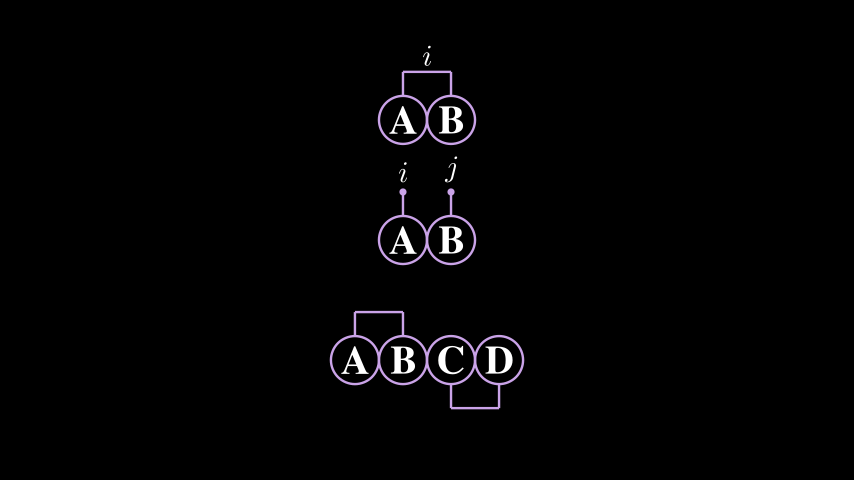

In [325]:
%%manim -ql -v CRITICAL PartitionsTest
#test out the functions that make partitions, makePartition

##pair partition code
P_COLOR = PURPLE_A
LETTER_COLOR = PURPLE_E
R = 0.4

def PartitionBlock_lines(letter_mobs,my_height):
    #given a list of mobs (from letter_mobs), return a VGroup with the partition connecting them
    
    #generate the points on the mob where the lines connect
    if my_height[1]>0: #check if pointing up or down
        mob_pts = [mob.get_top() for mob in letter_mobs]
    else:
        mob_pts = [mob.get_bottom() for mob in letter_mobs]
    
    #add in all the vertical lines
    mob_lines = [Line(pt,pt+my_height,color=P_COLOR) for pt in mob_pts]

    #make the horizontal line or the dot for a singleton:
    if len(letter_mobs)>1:
        #horizontal line connecting stuff
        min_x_pt = min(mob_pts, key=lambda p:p[0])
        max_x_pt = max(mob_pts, key=lambda p:p[0])
        decoration = Line(min_x_pt+my_height,max_x_pt+my_height,color=P_COLOR)
    else:
        #a dot
        decoration = Dot(mob_pts[0]+my_height,radius=0.06,color=P_COLOR)
    
    return VGroup(decoration,*mob_lines)


def makePartition(parts,heights,part_labels=None):
    #make a custom partion given a list of parts 
    #e.g. parts=[[0,2],[1]] is the partion where 0 is connected to 2, and 1 is a singleton
    #and list of heights for the partition
    #valid test: 
    #self.add(makePartition([[0,2],[1]],[R*UP,0.5*R*UP]))
    
    assert len(parts)==len(heights)
    num_blocks = len(parts) #number of blocks of the partition
    n = max( [max(part) for part in parts] ) + 1
    ALL_LABELS = ["A","B","C","D","E","F","G","H"]
    LABELS = ALL_LABELS[0:num_blocks+1]
    
    #create the list of letters
    P_dot = [None]*n #list of mobs holding the letters
    for i in range(n):
        P_dot[i] = MyLetterDot(LABELS[i]) #LabeledDot(Text(LABELS[i], color=WHITE,weight=BOLD), radius=R, color=P_COLOR, fill_color=LETTER_COLOR)
    letters = VGroup(*P_dot).arrange(RIGHT,buff=0)
    ans_group = VGroup(letters)
    
    labels = VGroup()
    #create each part
    for i in range(num_blocks):
        partBlock = PartitionBlock_lines([letters[i] for i in parts[i]],heights[i])
        ans_group.add(partBlock)
        if part_labels != None:
            labels.add(MathTex(part_labels[i]).next_to(partBlock,heights[i])) #add the label
    
    ans_group.add(labels)
    return ans_group
        


class PartitionsTest(Scene):
    def construct(self):
        test_PP_4 = PP4()
        self.add(test_PP_4[0].shift(2*DOWN))
        
        two_diff = makePartition([[0],[1]],[R*UP,R*UP],["i","j"])
        self.add(two_diff)
        for p in two_diff:
            print("---")
            printEnumerate(p)
        self.add(makePartition([[0,1]],[R*UP],["i"]).shift(2*UP))
        
    #Pair partion drawing helper functions


In [397]:
%%manim -ql -v CRITICAL k_equals_2
#Description: Proof when k equals 1

E_COLOR = GRAY_A

def myPP_lines(start_mob,end_mob,height,my_dir): 
    #returns a VGroup of 3 objects, which are the lines for the pair partiions
    #my_dir is either UP or DOWN
    if my_dir[1]>0:#check if my_dir is pointing up or down
        start_pt = start_mob.get_top()
        end_pt = end_mob.get_top()
    else:
        start_pt = start_mob.get_bottom()
        end_pt = end_mob.get_bottom()
        
    end_pt[1] = start_pt[1] #ensure they start/end at same height

    p1 = start_pt + my_dir*height
    p2 = end_pt + my_dir*height
    return VGroup(Line(p1,p2),Line(start_pt,p1),Line(end_pt,p2))

class k_equals_2(Scene):
    def construct(self):
        k_equals = MathTex("k","=","2",tex_to_color_map={"k":K_COLOR},font_size=EQN_SIZE_3)
        k_equals[2].color = K_COLOR
        k_equals.to_corner(UR)
        X_sum_moment = MathTex(r"=",r"\mathbb{E}\Bigl[",r"\bigl(","X_1","+","X_2",r"+\ldots+","X_{{n}}",r"\bigr)^{{2}}",r"\Bigr]",font_size=EQN_SIZE_3,tex_to_color_map={"n":N_COLOR})
        X_sum_moment[1].color=E_COLOR
        X_sum_moment[-1].color=E_COLOR
        #printEnumerate(X_sum_moment)
        X_sum_moment[-2].color = K_COLOR
        X_sum_moment[0].color=BLACK #make the equals sign black to hide it on first line
        X_sum_moment.to_corner(UL)
        self.add(X_sum_moment,k_equals)
        
        
        
        
        Line2 = MathTex(r"=",r"\mathbb{E}\Bigl[",r"\bigl(","X_1","+","X_2",r"+\ldots+","X_{{n}}",r"\bigr)",r"\bigl(","X_1","+","X_2",r"+\ldots+","X_{{n}}",r"\bigr)",r"\Bigr]",font_size=EQN_SIZE_3,tex_to_color_map={"n":N_COLOR,"k":K_COLOR})
        Line2[1].color = E_COLOR
        Line2[-1].color = E_COLOR
        Line2.next_to(X_sum_moment,4*DOWN)
        Line2.align_to(X_sum_moment,LEFT)
        self.play(TransformMatchingTex(X_sum_moment.copy(),Line2))
        self.wait(DELAY)
        
        #animate all possible pairs
        
        boxes_left = [SurroundingRectangle(mob,color=P_COLOR) for mob in [Line2[3],Line2[5],VGroup(*[Line2[7:9]])]]
        boxes_right = [SurroundingRectangle(mob,color=P_COLOR) for mob in [Line2[11],Line2[13],VGroup(*[Line2[15:17]])]]
        
        #animate boxes over all possible combos
        b_l = boxes_left[0].copy()
        b_r = boxes_right[0].copy()
        self.play(FadeIn(b_l),FadeIn(b_r))
        for i in range(0,len(boxes_left)): 
            b_l.generate_target()
            b_l.target = boxes_left[i]
            b_r.generate_target()
            b_r.target = boxes_right[0]
            self.play(MoveToTarget(b_l),MoveToTarget(b_r))
            for j in range(1,len(boxes_right)): #start at 1 to avoid double playing first config
                b_r.generate_target()
                b_r.target = boxes_right[j]
                self.play(MoveToTarget(b_r))
        self.play(FadeOut(b_l,b_r))
        
        #my_PP_lines = [myPP_lines(Line2[i],Line2[j],0.6,DOWN) for i in [3,5,7] for j in [11,13,15]]
        #old_PP = my_PP_lines[0]
        #self.play(FadeIn(old_PP))
        #for mob in my_PP_lines:
        #    self.play(ReplacementTransform(old_PP,mob))
        #    self.wait(0.5)
        #    old_PP = mob
        #   
        #self.play(FadeOut(old_PP))
        #self.wait(DELAY)
        #
        #return 0
        
                
        Line3 = MathTex(r"=",r"n",r"\mathbb{E}\Bigl[","X^2_i",r"\Bigr]",font_size=EQN_SIZE_3,tex_to_color_map={"n":N_COLOR,"k":K_COLOR})
        Line3[2].color = E_COLOR
        Line3[-1].color = E_COLOR
        Line3.next_to(Line2,DOWN)
        Line3.align_to(Line2,LEFT)
        self.play(FadeIn(Line3[0],Line3[2:],shift=DOWN))
        self.wait(DELAY)
        
        #animate the set where i = j
        b_l = boxes_left[0].copy()
        b_r = boxes_right[0].copy()
        b_lines = PartitionBlock_lines([b_l,b_r],R*UP)
        b_label = MathTex("i=","1").next_to(b_lines,UP)
        self.play(FadeIn(b_l),FadeIn(b_r))
        self.play(FadeIn(b_lines,b_label,shift=UP))
        MY_LABELS = ["1","2","n"]
        for i in range(1,len(boxes_left)): 
            b_l.generate_target()
            b_l.target = boxes_left[i]
            b_r.generate_target()
            b_r.target = boxes_right[i]
            
            b_lines.target = PartitionBlock_lines([b_l.target,b_r.target],R*UP)
            b_label.generate_target()
            b_label.target = MathTex("i=",MY_LABELS[i]).next_to(b_lines.target,UP)
            self.play(MoveToTarget(b_l),MoveToTarget(b_r),MoveToTarget(b_lines),MoveToTarget(b_label))
            
            
        
        
        self.play(FadeIn(Line3[1],shift=DOWN)) #fade in the factor of "n"
        self.play(FadeOut(b_l,b_r,b_lines,b_label)) #fade out the counter
        self.wait(DELAY)
        
        #animate pairs where i=j
        #my_PP_lines = [myPP_lines(Line2[tpl[0]],Line2[tpl[1]],0.6,DOWN) for tpl in [[3,11],[5,13],[7,15]] ]
        #old_PP = my_PP_lines[0]
        #self.play(FadeIn(old_PP))
        #for mob in my_PP_lines:
        #    self.play(ReplacementTransform(old_PP,mob))
        #    self.wait(1)
        #    old_PP = mob
        #
        #self.play(FadeOut(old_PP))
        #self.wait(DELAY)
        
       
        
        Line3B = MathTex(r"+{{n}}({{n}}-1)",r"\mathbb{E}\Bigl[","X_i", "X_j",r"\Bigr]",font_size=EQN_SIZE_3,tex_to_color_map={"n":N_COLOR,"k":K_COLOR,"\mathbb{E}\Bigl[":E_COLOR,"\Bigr]":E_COLOR})
        Line3B.next_to(Line3,RIGHT)
        self.play(FadeIn(Line3B[0],Line3B[5:],shift=DOWN))
        self.wait(DELAY)
        
        #animate the set where i = j
        b_l = boxes_left[0].copy()
        b_l_dot = PartitionBlock_lines([b_l],R*UP)
        b_l_label = MathTex("i=","1").next_to(b_l_dot,UP)
        
        b_r = boxes_right[1].copy()
        b_r_dot = PartitionBlock_lines([b_r],R*UP)
        b_r_label = MathTex("j=","2").next_to(b_r_dot,UP)
        
        self.play(FadeIn(b_l),FadeIn(b_r))
        self.play(FadeIn(b_l_dot,b_l_dot,b_r_dot,b_l_label,b_r_label,shift=UP))
        
        MY_LABELS = ["1","2","n"]
        mob_list = [b_l,b_r,b_l_dot,b_r_dot,b_l_label,b_r_label]
                    
        for i in range(len(boxes_left)): 
            for j in range(len(boxes_right)):
                if i != j:
                    b_l.generate_target()
                    b_l.target = boxes_left[i]
                    b_l_dot.generate_target()
                    b_l_dot.target = PartitionBlock_lines([b_l.target],R*UP)
                    b_l_label.generate_target()
                    b_l_label.target = MathTex("i=",MY_LABELS[i]).next_to(b_l_dot.target,UP)

                    b_r.generate_target()
                    b_r.target = boxes_right[j]
                    b_r_dot.generate_target()
                    b_r_dot.target = PartitionBlock_lines([b_r.target],R*UP)           
                    b_r_label.generate_target()
                    b_r_label.target = MathTex("j=",MY_LABELS[j]).next_to(b_r_dot.target,UP)
                    
                    self.play(*[MoveToTarget(mob) for mob in mob_list])

        
        #my_PP_lines = [myPP_lines(Line2[tpl[0]],Line2[tpl[1]],0.6,DOWN) for tpl in [[3,13],[3,15],[5,11],[5,15],[7,11],[7,15]] ]
        #old_PP = my_PP_lines[0]
        #self.play(FadeIn(old_PP))
        #for mob in my_PP_lines:
        #    self.play(ReplacementTransform(old_PP,mob))
        #    self.wait(0.5)
        #    old_PP = mob
        #
        #self.play(FadeOut(old_PP))
        #self.wait(DELAY)
        
        
        self.play(FadeIn(Line3B[1:5],shift=DOWN))
        self.play(FadeOut(*mob_list))
        self.wait(DELAY)    
        
        
        Line3B_trans = MathTex(r"+{{n}}({{n}}-1)",r"\mathbb{E}\Bigl[","X_i",r"\Bigr]",r"\mathbb{E}\Bigl[","X_j",r"\Bigr]",tex_to_color_map={"n":N_COLOR,"\mathbb{E}\Bigl[":E_COLOR,"\Bigr]":E_COLOR},font_size=EQN_SIZE_3)
        Line3B_trans.next_to(Line3,RIGHT)
        #Line4.next_to(Line3,DOWN)
        #Line4.align_to(Line3,LEFT)
        #Line4B.next_to(Line4,RIGHT)
        #self.play(TransformMatchingTex(Line3.copy(),Line4),TransformMatchingTex(Line3B.copy(),Line4B))
        self.play(TransformMatchingTex(Line3B,Line3B_trans))
        self.wait(DELAY)
        
        Partition_Xi_sq = makePartition([[0,1]],[R*UP],["i"])
        Partition_Xi_Xj = makePartition([[0],[1]],[R*UP,R*UP],["i","j"])
        
        brace_left = Brace(Line3[1:],color=TEXT_COLOR).next_to(Line3[1:],DOWN,buff=0.1)
        brace_right = Brace(Line3B_trans[1:],color=TEXT_COLOR).next_to(Line3B_trans[1:],DOWN,buff=0.1)
        
        
        Partition_Xi_Xj.next_to(brace_right,DOWN,buff=0.05)
        
        Partition_Xi_sq.next_to(brace_left,DOWN,buff=0.05)
        
        Partition_Xi_sq.align_to(Partition_Xi_Xj,DOWN) #align this one down a tiny bit just because the "j" is taller than the "i"
        
        self.play(FadeIn(brace_left),FadeIn(Partition_Xi_sq,shift=DOWN))
        self.wait(DELAY)
        self.play(FadeIn(brace_right),FadeIn(Partition_Xi_Xj,shift=DOWN))
        self.wait(DELAY)
        
        Line4 =MathTex(r"=",r"n",r"\cdot 1",font_size=EQN_SIZE_3,tex_to_color_map={"n":N_COLOR,"k":K_COLOR})
        Line4B = MathTex("+0",tex_to_color_map={"n":N_COLOR},font_size=EQN_SIZE_3) #r"+{{n}}({{n}}-1)","\cdot 
        
        Line4.next_to(Line3B_trans,RIGHT)
        #Line5.align_to(Line4,LEFT)
        Line4B.next_to(Line4,RIGHT)
        #Line5B.align_to(Line4B,LEFT)
        
        self.play(ReplacementTransform(Line3.copy(),Line4,path_arc=-1.57))
        self.wait(DELAY)
        self.play(ReplacementTransform(Line3B_trans.copy(),Line4B,path_arc=-1.57))
        self.wait(DELAY)
        
        
        
        Line6 = MathTex(r"=","n",font_size=EQN_SIZE_3,tex_to_color_map={"n":N_COLOR,"k":K_COLOR})
        #Line6.next_to(Line3B_trans,RIGHT)
        #Line6.align_to(Line4,LEFT)
        #Line6.align_to(Line4,DOWN) 
        self.play(FadeOut(Line4[2:],Line4B))
        self.wait(DELAY)
        
        eq_n = Line4[0:2]
        eq_n.generate_target()
        eq_n.target.next_to(X_sum_moment,RIGHT)

        self.play(MoveToTarget(eq_n),FadeOut(Line2,Line3,Line3B_trans,brace_left,brace_right,Partition_Xi_sq,Partition_Xi_Xj))
        self.wait(DELAY)
        
        #animate dividing by the square root of n to get 1
        X_sum_moment_div = MathTex(r"\mathbb{E}\Bigl[",r"\bigl(",r"{{","X_1","+","X_2",r"+\ldots+","X_{{n}}",r"}\over{\phantom{\sqrt{n}}}}",r"\bigr)^{{2}}",r"\Bigr]",font_size=EQN_SIZE_3)
        
        X_sum_moment_div[-2].color = K_COLOR
        X_sum_moment_div[8].color=N_COLOR
        X_sum_moment_div.next_to(X_sum_moment,DOWN)
        X_sum_moment_div.align_to(X_sum_moment,RIGHT)
        
        
        sqrtN = MathTex("\sqrt{{{n}}}",font_size=EQN_SIZE_3,tex_to_color_map={"n":N_COLOR})
        sqrtN.next_to(X_sum_moment_div[9],DOWN,buff=0.05)
        
        
        Line7 = MathTex(r"=","1",font_size=EQN_SIZE_3,tex_to_color_map={"n":N_COLOR,"k":K_COLOR})
        Line7.next_to(X_sum_moment_div,RIGHT)
        
        self.play(TransformMatchingTex(X_sum_moment.copy(),X_sum_moment_div),Transform(eq_n[1].copy(),sqrtN),FadeIn(Line7,shift=DOWN)) # ,k_equals)
        
        
        
        self.wait(2)
        

In [ ]:
%%manim -ql -v CRITICAL Graph
from manim import *

def PP_lines(start_mob,end_mob,height,my_dir): 
        #returns a VGroup of 3 objects, which are the lines for the pair partiions
        #my_dir is either UP or DOWN
        if my_dir[1]>0:#check if my_dir is pointing up or down
            start = start_mob.get_top()
            end = end_mob.get_top()
        else:
            start = start_mob.get_bottom()
            end = end_mob.get_bottom()

        p1 = start + my_dir*height
        p2 = end + my_dir*height
        return VGroup(Line(p1,p2),Line(start,p1),Line(end,p2))


class Graph(Scene):
    def construct(self):
        
            
        def PP4():
            #return a list of 3 vgroups for the three pair partitions on 4 elements
            P_COLOR = GRAY_D
            LABELS = ["A","B","C","D"]
            R = 0.4

            P_dot = [None]*4
            for i in range(4):
                P_dot[i] = LabeledDot(Tex(LABELS[i], color=WHITE), radius=R, color=P_COLOR)
            letters = VGroup(*P_dot).arrange(RIGHT,buff=0)

            
            PP = [None]*3
            
            line_1 = PP_lines(P_dot[0],P_dot[1],R,UP)
            line_2 = PP_lines(P_dot[2],P_dot[3],R,DOWN)
            PP[0] = VGroup(letters.copy(),line_1,line_2)
            
            line_1 = PP_lines(P_dot[0],P_dot[2],R,UP)
            line_2 = PP_lines(P_dot[1],P_dot[3],R,DOWN)
            PP[1] = VGroup(letters.copy(),line_1,line_2)
            
            line_1 = PP_lines(P_dot[0],P_dot[3],R,UP)
            line_2 = PP_lines(P_dot[1],P_dot[2],R,DOWN)
            PP[2] = VGroup(letters.copy(),line_1,line_2)
            
            return PP[0],PP[1],PP[2]
        
        def PP6():
            #return a list of 3 vgroups for the three pair partitions on 4 elements
            P_COLOR = GRAY_D
            LABELS = ["A","B","C","D","E","F"]
            R = 0.4

            P_dot = [None]*6
            for i in range(6):
                P_dot[i] = LabeledDot(Tex(LABELS[i], color=WHITE), radius=R, color=P_COLOR)
            letters = VGroup(*P_dot).arrange(RIGHT,buff=0)

            def my_PP(a,b,c,d,e,f,last_h):
                #Pairs a-b, c-d, and e-f with e-f being scaled by last_h
                line_1 = PP_lines(P_dot[a],P_dot[b],R,UP)
                line_2 = PP_lines(P_dot[c],P_dot[d],R,DOWN)
                line_3 = PP_lines(P_dot[e],P_dot[f],R,last_h*UP)
                return VGroup(letters.copy(),line_1,line_2,line_3)

            
            PP = [None]*15
            
            #AB pairings
            PP[0] = my_PP(0,1,2,3,4,5,1.0)
            PP[1] = my_PP(0,1,2,4,3,5,1.0)
            PP[2] = my_PP(0,1,2,5,3,4,1.0)
            
            #AC pairings
            PP[3] = my_PP(0,2,1,3,4,5,1.0)
            PP[4] = my_PP(0,2,1,4,3,5,1.0)
            PP[5] = my_PP(0,2,1,5,3,4,1.0)
            
            #AD pairings
            PP[6] = my_PP(0,3,1,2,4,5,1.0)
            PP[7] = my_PP(0,3,1,4,2,5,0.5)
            PP[8] = my_PP(0,3,1,5,2,4,0.5)
            
            #AE pairings
            PP[9] = my_PP(0,4,1,2,3,5,0.5)
            PP[10] = my_PP(0,4,1,3,2,5,0.5)
            PP[11] = my_PP(0,4,1,5,2,3,0.5)
            
            #AF pairings
            PP[12] = my_PP(0,5,1,2,3,4,0.5)
            PP[13] = my_PP(0,5,1,3,2,4,0.5)
            PP[14] = my_PP(0,5,1,4,2,3,0.5)
            return PP
        
        #PP = PP6()
        #PP_cols = [None]*5
        #for i in range(5):
        #    PP_cols[i] = VGroup(*[PP[3*i+k].scale(0.5) for k in range(3)]).arrange(DOWN,buff=0.4)
        #All = VGroup(*PP_cols).arrange(RIGHT,buff=0.25)
        #self.add(All)
        
        PP = PP4()
        All = VGroup(*PP).arrange(RIGHT,buff=1)
        printEnumerate(PP[0][0])
        self.add(All)
        
        
        
        
        GaussPDF = MathTexAndColor(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"\sigma^2}\bigl(",r" {{x}}","-\mu",r"\bigr)",r"^2}",r"/ {\sqrt{2\pi", r"\sigma^2}}")
        StandardGaussPDF = MathTexAndColor(r"p_{{Z}}({{x}})=",r" e^{-\frac{1}{2", r"} {{x}}^2}",r"/ {\sqrt{2\pi", r"}}")
        printEnumerate(StandardGaussPDF)
        printEnumerate(GaussPDF)
        self.add(GaussPDF)
        self.play(TransformMatchingTex(GaussPDF,StandardGaussPDF))
        
        
        Z_COLOR = WHITE
        
        #BELL_CURVE.set_height(BELL_CURVE.height*0.5)
        
        Line1 = MathTex(r"\text{Central Limit Theorem:}",font_size=EQN_SIZE)
        Line2 = MathTex(r"\text{As }"r"{{n}}",r"\to \infty,", r"\text{ the sum of }", r"{{n}}", r"\text{ random variables behave like}")
        Line2[1].color = N_COLOR
        Line2[4].color =  N_COLOR

        Line3 = MathTex(r"X_1 + X_2 + X_3 +\ldots+X_{{n}}}",r"\approx {{Z}},",font_size=EQN_SIZE)
        Line3[1].color =  N_COLOR
        printEnumerate(Line3)
        Line4 = MathTex(r"\text{ where }Z\text{ is a }",r"\text{Gaussian}",r"\text{ random variable.}")
        Line4[1].color = Z_COLOR
        
        printEnumerate(Line4)
        CLT = VGroup(Line1,Line2,Line3,Line4).arrange(DOWN)
        Line1.align_to(Line2,LEFT)
        Line4.align_to(Line2,LEFT)
        
        ul = Underline(Line1)
        ul2 = Underline(Line4[1])
        ul2.color = Z_COLOR
        box = SurroundingRectangle(CLT,buff=0.4)
        
        self.add(CLT,ul,ul2,box)
        

        
        self.wait()


In [142]:
%%manim -ql -v CRITICAL RateFunctions1Example

class myEx(Scene):
    def construct(self):
        my_line = Dot()
        self.add(my_line)
        
class LineExample(Scene):
    def construct(self):
        d = VGroup()
        for i in range(0,10):
            d.add(Dot())
        d.arrange_in_grid(buff=1)
        self.add(d)
        l= Line(d[0], d[1])
        self.add(l)
        return 0
        self.wait()
        l.put_start_and_end_on(d[1].get_center(), d[2].get_center())
        self.wait()
        l.put_start_and_end_on(d[4].get_center(), d[7].get_center())
        self.wait()

class RateFunctions1Example(Scene):
    def construct(self):
        line1 = Line(3*LEFT, 3*RIGHT).shift(UP).set_color(RED)
        line2 = Line(3*LEFT, 3*RIGHT).set_color(GREEN)
        line3 = Line(3*LEFT, 3*RIGHT).shift(DOWN).set_color(BLUE)

        
        dot1 = Dot().move_to(line1.get_left())
        dot2 = Dot().move_to(line2.get_left())
        dot3 = Dot().move_to(line3.get_left())

        label1 = Tex("Ease In").next_to(line1, RIGHT)
        label2 = Tex("Ease out").next_to(line2, RIGHT)
        label3 = Tex("Ease In Out").next_to(line3, RIGHT)

        self.play(
            FadeIn(VGroup(line1, line2, line3)),
            FadeIn(VGroup(dot1, dot2, dot3)),
            Write(VGroup(label1, label2, label3)),
        )
        dot2.generate_target()
        dot2.target.shift(6*RIGHT)
        
        self.play(
            MoveAlongPath(dot1, line1, rate_func=rate_functions.ease_in_sine),
            MoveToTarget(dot2, rate_func=rate_functions.ease_out_sine),
            MoveAlongPath(dot3, line3, rate_func=rate_functions.ease_in_out_sine),
            run_time=7
        )
        self.wait()